In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

# Categorization Analysis

1.Explore the performance of different fund categories (Equity, Debt,      Hybrid) and sub-categories (Small Cap, Medium Duration, etc.).

2.Identify which categories have shown the best and worst returns.

In [2]:
df = pd.read_csv(r"C:\Users\Samson\Desktop\comprehensive_mutual_funds_data.csv")
df.head()

scheme_name  min_sip  min_lumpsum  \
0  Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...      100          100   
1                     Aditya Birla SL Arbitrage Fund     1000         1000   
2     Aditya Birla SL Asset Allocator FoF-Dir Growth     1000         1000   
3   Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
4            Aditya Birla SL Balanced Advantage Fund      100          100   

   expense_ratio  fund_size_cr  fund_age_yr        fund_manager sortino  \
0           0.27          10.0           10      Kaustubh Gupta    0.32   
1           0.36        4288.0           10    Lovelish Solanki    1.33   
2           0.53         157.0           10  Vinod Narayan Bhat    3.44   
3           0.76         637.0            4         Atul Penkar    2.18   
4           0.61        6386.0           10        Mohit Sharma    3.69   

   alpha     sd  beta sharpe  risk_level                           amc_name  \
0   2.24   9.39  0.01   0.24           3  Aditya Birla Sun Life Mutual Fund   
1   1.53   0.72  0.56    1.1           1  Aditya Birla Sun Life Mutual Fund   
2   2.67  10.58  0.67   1.42           5  Aditya Birla Sun Life Mutual Fund   
3  -6.37  14.99  0.85    0.9           6  Aditya Birla Sun Life Mutual Fund   
4   1.99  10.38  0.68   1.39           6  Aditya Birla Sun Life Mutual Fund   

   rating           category                                    sub_category  \
0       3              Other                                   FoFs Domestic   
1       3             Hybrid                          Arbitrage Mutual Funds   
2       3              Other                                   FoFs Domestic   
3       2  Solution Oriented                                 Childrens Funds   
4       4             Hybrid  Dynamic Asset Allocation or Balanced Advantage   

   returns_1yr  returns_3yr  returns_5yr  
0          4.0          6.5          6.9  
1          5.6          4.8          5.5  
2          2.0         18.9          9.7  
3         -0.7         17.1          NaN  
4          4.5         18.6          9.7

# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [4]:
df['fund_manager'].value_counts()

Rohit Seksaria       18
Deepak Agrawal       12
R Srinivasan         12
Devang Shah          11
Alok Ranjan          11
                     ..
Samir Rachh           1
Ashutosh Bhargava     1
Sanjay Doshi          1
Varun Sharma          1
Rahul Jagwani         1
Name: fund_manager, Length: 260, dtype: int64

In [5]:
df['category'].value_counts()

Equity               308
Debt                 282
Hybrid               116
Other                 80
Solution Oriented     28
Name: category, dtype: int64

In [6]:
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [7]:
df['returns_3yr'].fillna(df['returns_3yr'].mean(),inplace=True)
df['returns_5yr'].fillna(df['returns_5yr'].mean(),inplace=True)

In [8]:
df.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [9]:
df.shape

(814, 20)

In [10]:
df = df.drop(columns=['sortino','alpha','sd','beta','sharpe'],axis=1)
           

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   risk_level     814 non-null    int64  
 8   amc_name       814 non-null    object 
 9   rating         814 non-null    int64  
 10  category       814 non-null    object 
 11  sub_category   814 non-null    object 
 12  returns_1yr    814 non-null    float64
 13  returns_3yr    814 non-null    float64
 14  returns_5yr    814 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 95.5+ KB


In [12]:
df.columns

Index(['scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio',
       'fund_size_cr', 'fund_age_yr', 'fund_manager', 'risk_level', 'amc_name',
       'rating', 'category', 'sub_category', 'returns_1yr', 'returns_3yr',
       'returns_5yr'],
      dtype='object')

In [13]:
df

scheme_name  min_sip  min_lumpsum  \
0    Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...      100          100   
1                       Aditya Birla SL Arbitrage Fund     1000         1000   
2       Aditya Birla SL Asset Allocator FoF-Dir Growth     1000         1000   
3     Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
4              Aditya Birla SL Balanced Advantage Fund      100          100   
..                                                 ...      ...          ...   
809            UTI-Unit Linked Insurance Plan – Direct      500        15000   
810                       UTI-Value Opportunities Fund      500         5000   
811                       WhiteOak Capital Liquid Fund      500          500   
812                    WhiteOak Capital Overnight Fund      500          500   
813             WhiteOak Capital Ultra Short Term Fund      500          500   

     expense_ratio  fund_size_cr  fund_age_yr        fund_manager  risk_level  \
0             0.27          10.0           10      Kaustubh Gupta           3   
1             0.36        4288.0           10    Lovelish Solanki           1   
2             0.53         157.0           10  Vinod Narayan Bhat           5   
3             0.76         637.0            4         Atul Penkar           6   
4             0.61        6386.0           10        Mohit Sharma           6   
..             ...           ...          ...                 ...         ...   
809           0.96        5068.0           10     Amandeep Chopra           4   
810           1.16        6740.0           10   Vetri Subramaniam           6   
811           0.26         197.0            4     Piyush Baranwal           1   
812           0.22          14.0            4     Piyush Baranwal           1   
813           0.33         141.0            4     Piyush Baranwal           1   

                              amc_name  rating           category  \
0    Aditya Birla Sun Life Mutual Fund       3              Other   
1    Aditya Birla Sun Life Mutual Fund       3             Hybrid   
2    Aditya Birla Sun Life Mutual Fund       3              Other   
3    Aditya Birla Sun Life Mutual Fund       2  Solution Oriented   
4    Aditya Birla Sun Life Mutual Fund       4             Hybrid   
..                                 ...     ...                ...   
809                    UTI Mutual Fund       0             Hybrid   
810                    UTI Mutual Fund       4             Equity   
811       WhiteOak Capital Mutual Fund       1               Debt   
812       WhiteOak Capital Mutual Fund       1               Debt   
813       WhiteOak Capital Mutual Fund       2               Debt   

                                       sub_category  returns_1yr  returns_3yr  \
0                                     FoFs Domestic          4.0          6.5   
1                            Arbitrage Mutual Funds          5.6          4.8   
2                                     FoFs Domestic          2.0         18.9   
3                                   Childrens Funds         -0.7         17.1   
4    Dynamic Asset Allocation or Balanced Advantage          4.5         18.6   
..                                              ...          ...          ...   
809  Dynamic Asset Allocation or Balanced Advantage         -0.7         13.1   
810                                     Value Funds          1.7         27.2   
811                             Liquid Mutual Funds          5.3          3.8   
812                          Overnight Mutual Funds          1.7         32.4   
813                      Ultra Short Duration Funds          5.3          4.5   

     returns_5yr  
0       6.900000  
1       5.500000  
2       9.700000  
3       9.490726  
4       9.700000  
..           ...  
809     6.200000  
810    12.200000  
811     9.490726  
812    13.300000  
813     9.490726  

[814 rows x 15 columns]

# EDA Analsis:

<Axes: title={'center': 'Categorization Analysis'}, xlabel='category', ylabel='count'>

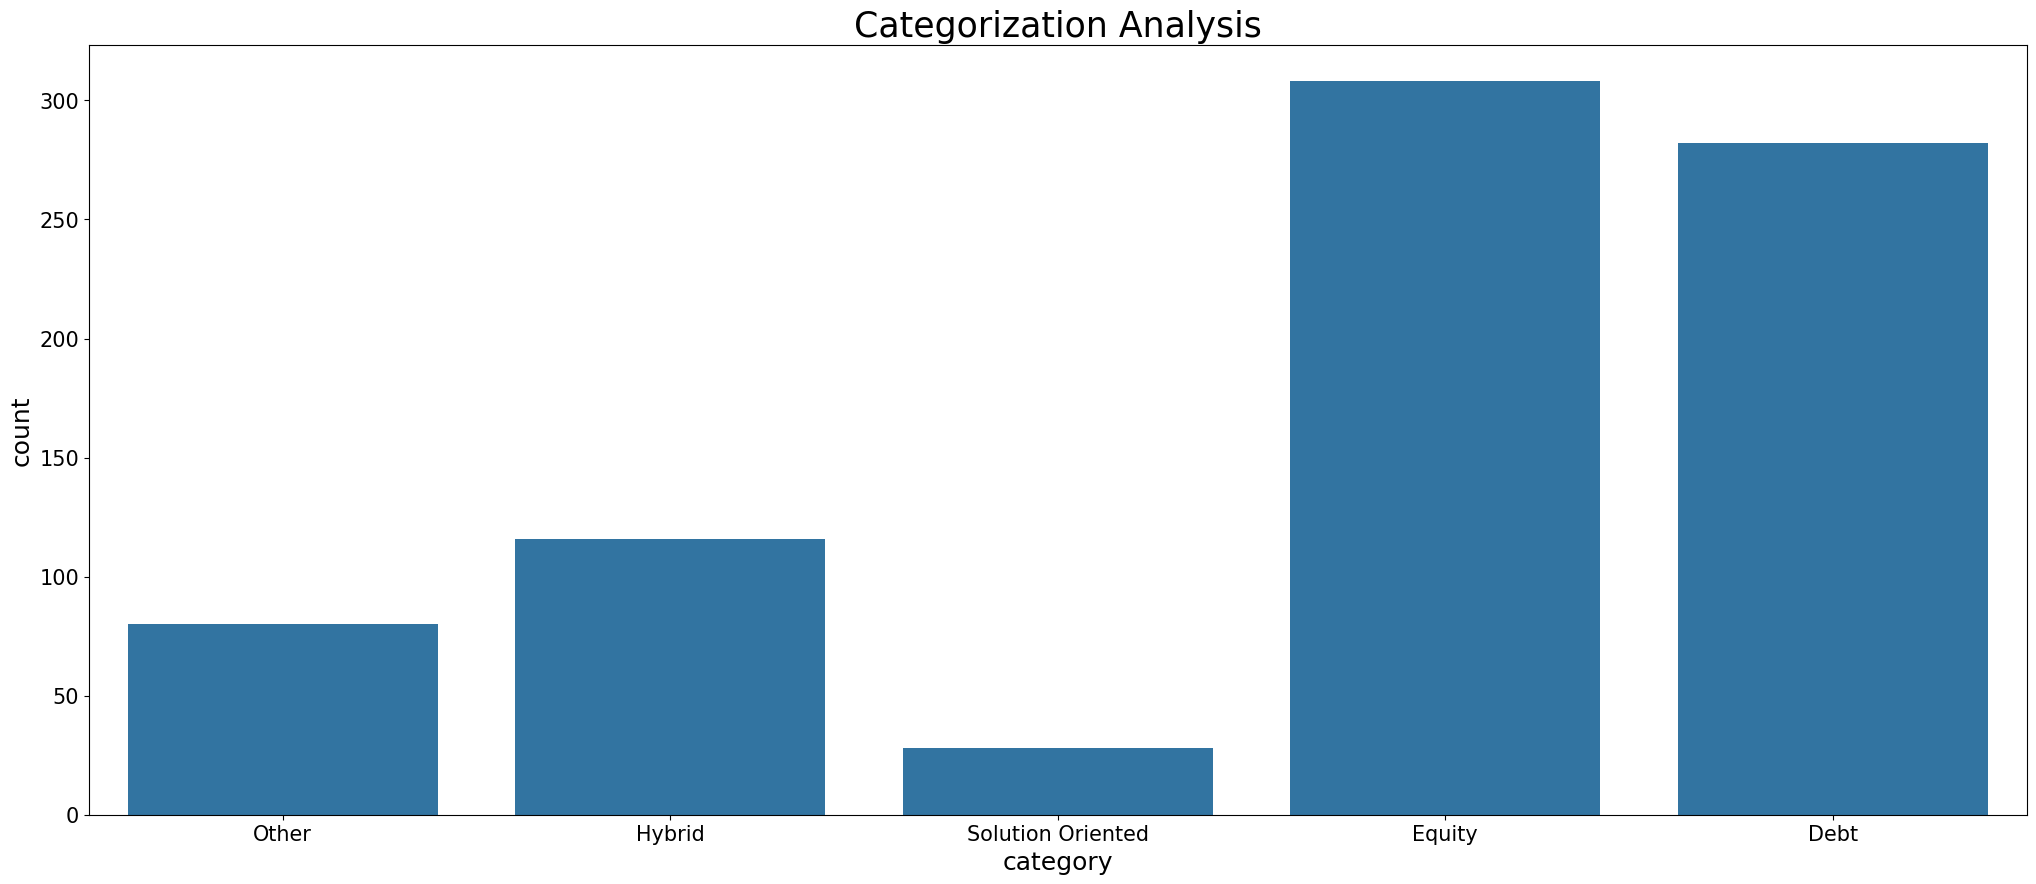

In [14]:
plt.figure(figsize=(25,10))
plt.title("Categorization Analysis",fontsize=25)
plt.xlabel('category' , fontsize=18)
plt.ylabel('count' , fontsize=18)  
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
           
           
sns.countplot(x=df['category'])          

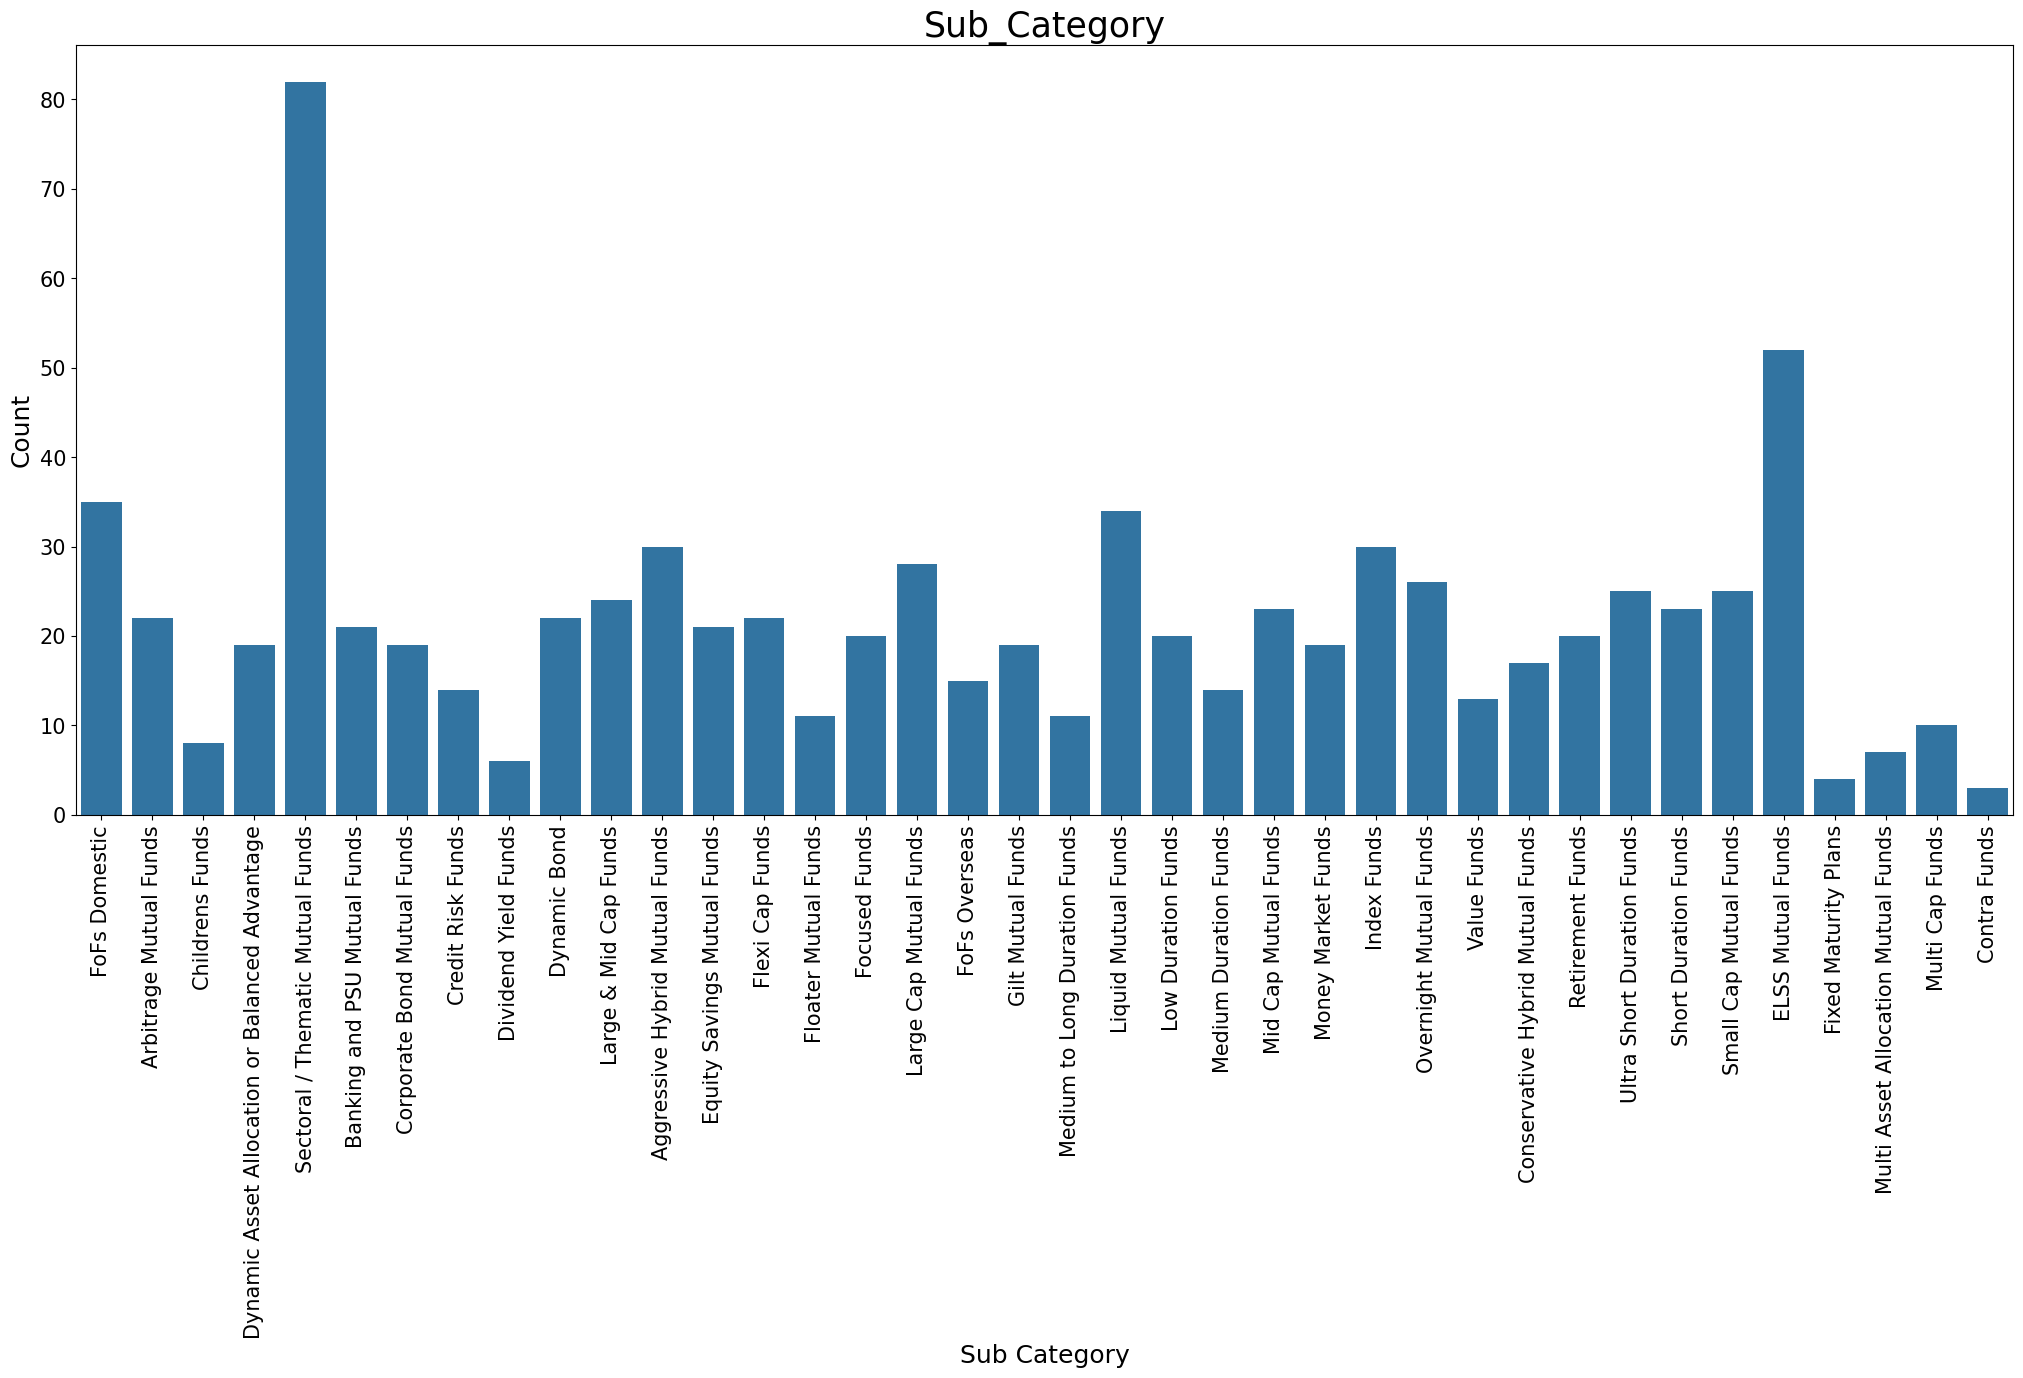

In [15]:
plt.figure(figsize=(25,10))
plt.title('Sub_Category',fontsize=25)
plt.xlabel('Sub Category',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

sns.countplot(x=df['sub_category'])
plt.show()

In [16]:
year_1 = df.groupby('category')['returns_1yr'].mean()
year_3 = df.groupby('category')['returns_3yr'].mean()
year_5 = df.groupby('category')['returns_5yr'].mean()

In [17]:
year_1

category
Debt                 5.547872
Equity               2.842532
Hybrid               4.075000
Other                2.891250
Solution Oriented    1.714286
Name: returns_1yr, dtype: float64

In [18]:
year_3

category
Debt                  7.057027
Equity               29.701706
Hybrid               15.272414
Other                20.764067
Solution Oriented    18.167857
Name: returns_3yr, dtype: float64

In [19]:
year_5

category
Debt                  7.145249
Equity               11.651092
Hybrid                8.745735
Other                10.466895
Solution Oriented     9.646357
Name: returns_5yr, dtype: float64

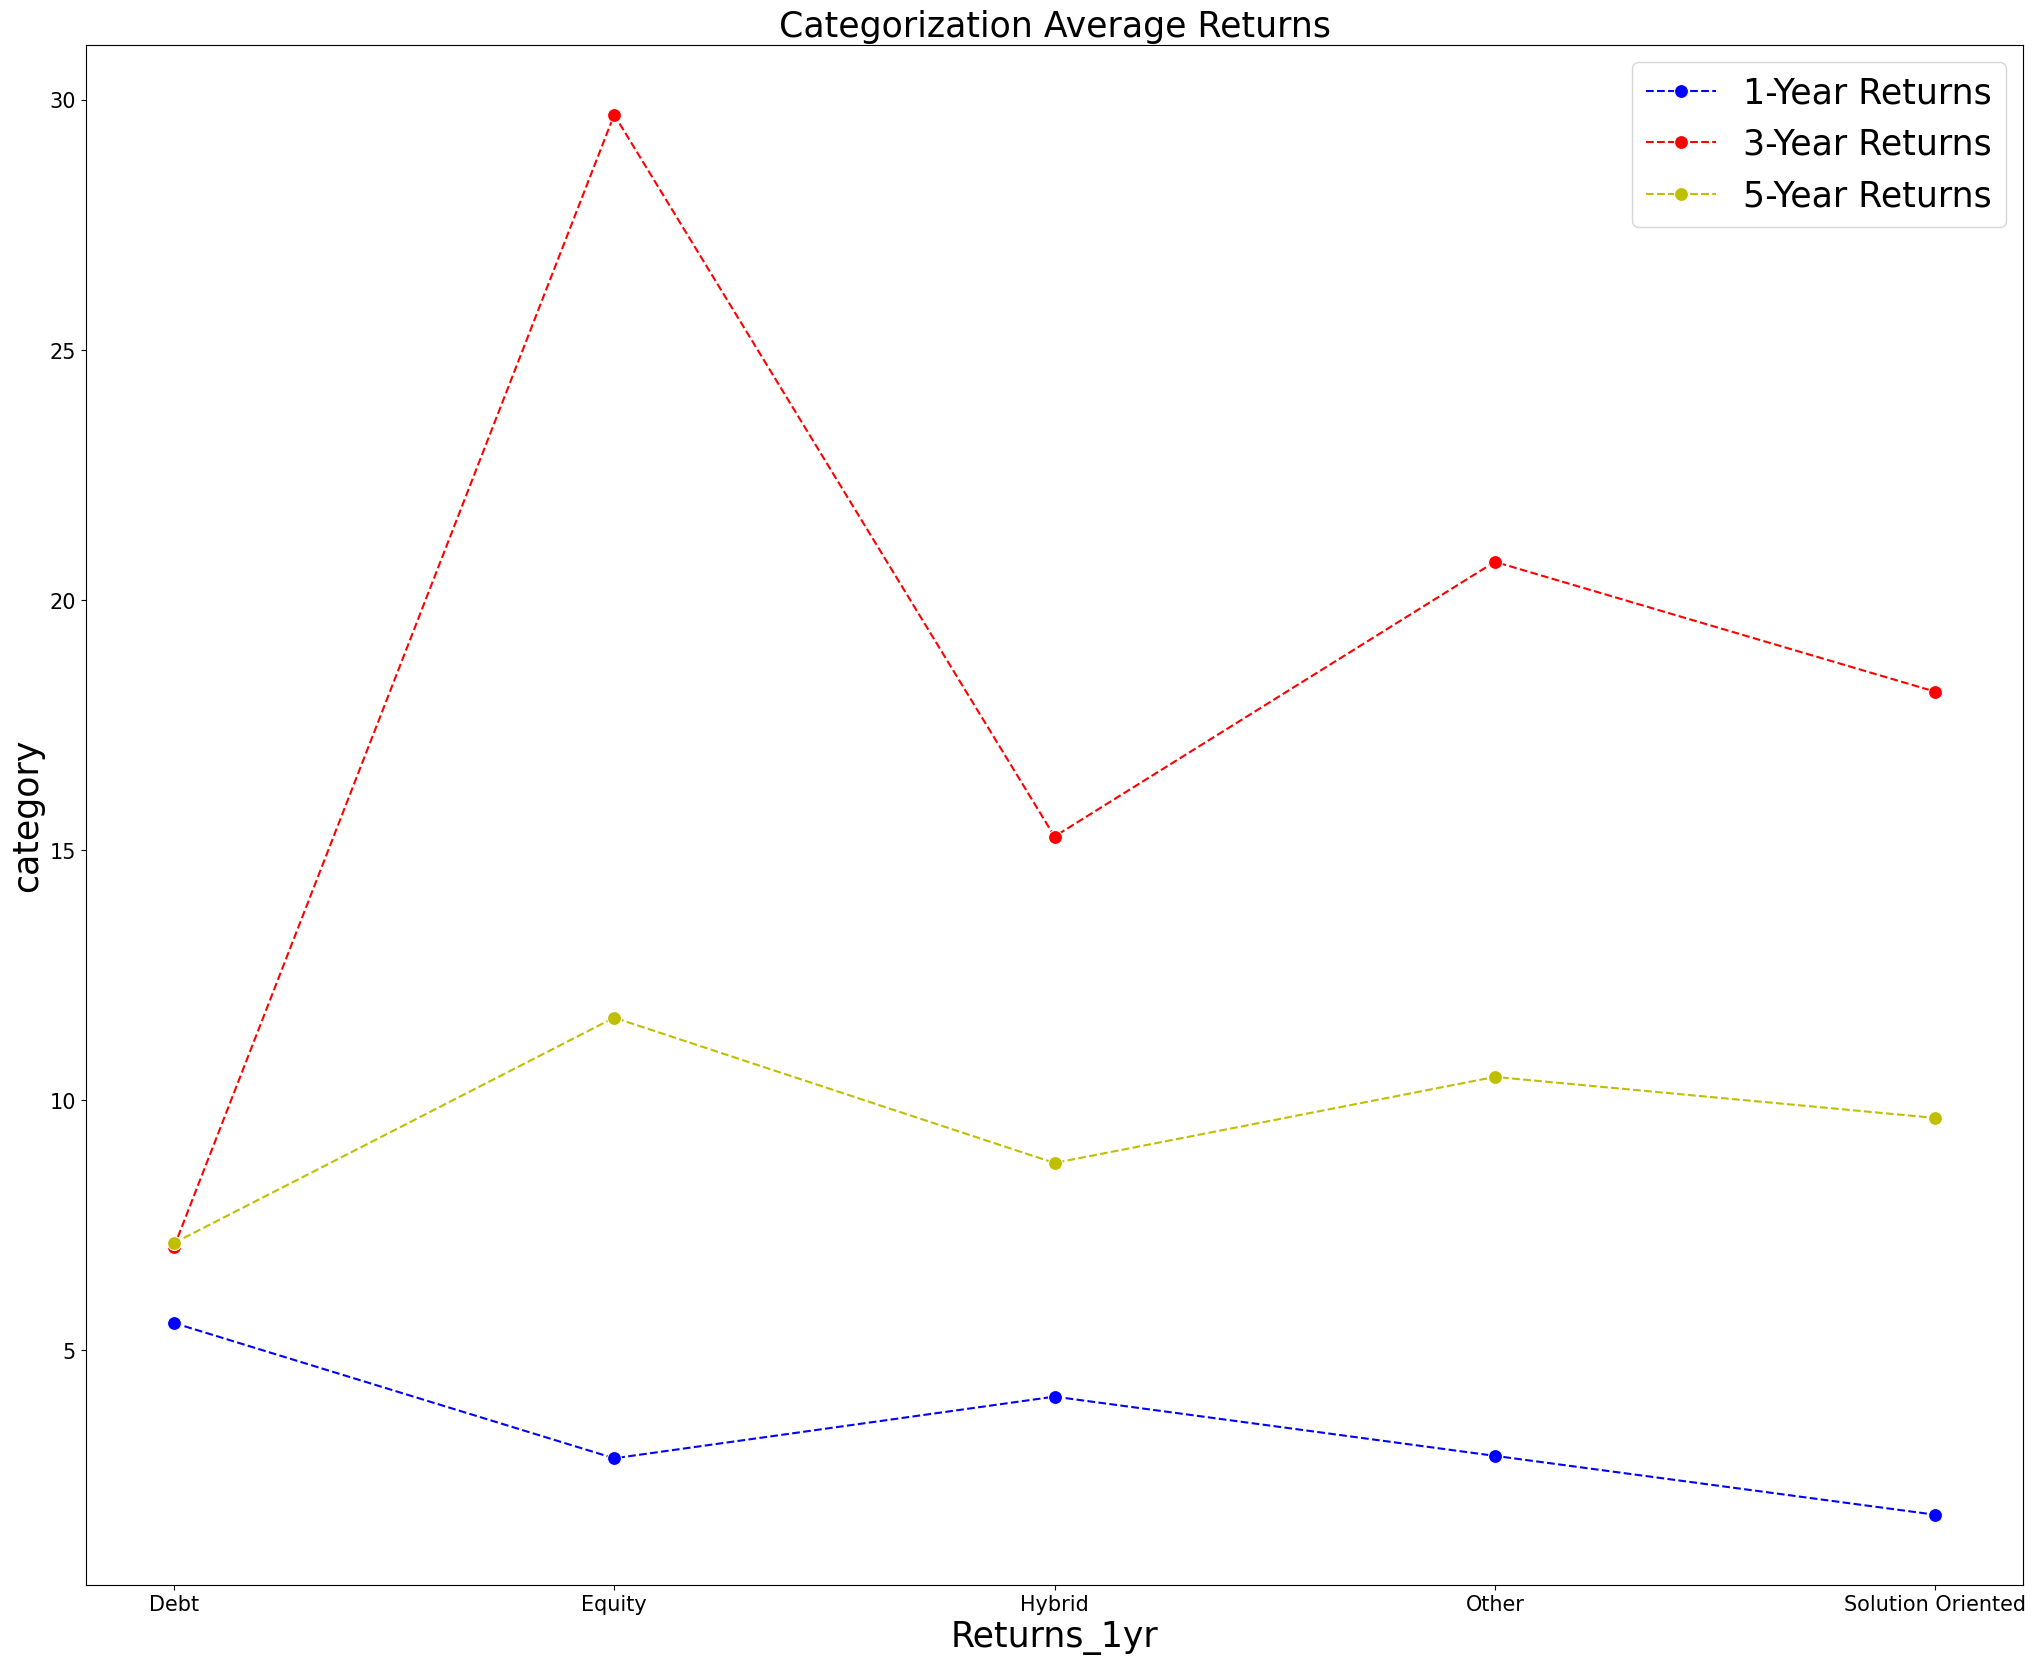

In [20]:
plt.figure(figsize=(25,20))
plt.title("Categorization Average Returns",fontsize=25)
plt.xlabel('Returns_1yr', fontsize=25)
plt.ylabel('category',fontsize=25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

sns.lineplot(x=year_1.index, y=year_1.values,label='1-Year Returns',
            color = 'b',marker='o',linestyle = '--',markersize=10)
sns.lineplot(x=year_3.index, y=year_3.values,label='3-Year Returns',
            color = 'r',marker='o',linestyle = '--',markersize=10)
sns.lineplot(x=year_5.index,y=year_5.values,label='5-Year Returns',
            color = 'y',marker='o',linestyle = '--',markersize=10)

plt.legend(fontsize=25)

In [ ]:
# Result:
# for 1 year Debt and Hybrid fund perfomance well.
# for 3 year Equity fund perfomance would be great. Similarly,
# for 5 year Equity fund perfomance would be great but all are okay in the term of returns.

In [21]:
year_1df = df.groupby('sub_category')['returns_1yr'].mean()
year_3df = df.groupby('sub_category')['returns_3yr'].mean()
year_5df = df.groupby('sub_category')['returns_5yr'].mean()

In [22]:
year_1df

sub_category
Aggressive Hybrid Mutual Funds                     2.450000
Arbitrage Mutual Funds                             5.363636
Banking and PSU Mutual Funds                       4.257143
Childrens Funds                                    0.462500
Conservative Hybrid Mutual Funds                   5.247059
Contra Funds                                       8.366667
Corporate Bond Mutual Funds                        3.984211
Credit Risk Funds                                 14.421429
Dividend Yield Funds                               4.133333
Dynamic Asset Allocation or Balanced Advantage     4.342105
Dynamic Bond                                       4.727273
ELSS Mutual Funds                                  1.426923
Equity Savings Mutual Funds                        3.561905
Fixed Maturity Plans                               7.900000
Flexi Cap Funds                                    0.286364
Floater Mutual Funds                               5.318182
FoFs Domestic              

In [23]:
year_3df

sub_category
Aggressive Hybrid Mutual Funds                    23.223333
Arbitrage Mutual Funds                             4.418182
Banking and PSU Mutual Funds                       8.757209
Childrens Funds                                   20.650000
Conservative Hybrid Mutual Funds                  11.511765
Contra Funds                                      33.566667
Corporate Bond Mutual Funds                        8.517124
Credit Risk Funds                                  8.328571
Dividend Yield Funds                              30.700000
Dynamic Asset Allocation or Balanced Advantage    16.036842
Dynamic Bond                                       7.887516
ELSS Mutual Funds                                 29.517308
Equity Savings Mutual Funds                       14.147619
Fixed Maturity Plans                              10.350000
Flexi Cap Funds                                   26.363636
Floater Mutual Funds                              10.854672
FoFs Domestic              

In [24]:
year_5df

sub_category
Aggressive Hybrid Mutual Funds                    10.708454
Arbitrage Mutual Funds                             6.193347
Banking and PSU Mutual Funds                       7.559697
Childrens Funds                                    9.698841
Conservative Hybrid Mutual Funds                   7.341176
Contra Funds                                      14.033333
Corporate Bond Mutual Funds                        7.944928
Credit Risk Funds                                  4.785714
Dividend Yield Funds                              11.515121
Dynamic Asset Allocation or Balanced Advantage     8.871244
Dynamic Bond                                       7.539645
ELSS Mutual Funds                                 11.466059
Equity Savings Mutual Funds                        8.483065
Fixed Maturity Plans                              11.745363
Flexi Cap Funds                                   11.657826
Floater Mutual Funds                               8.285851
FoFs Domestic              

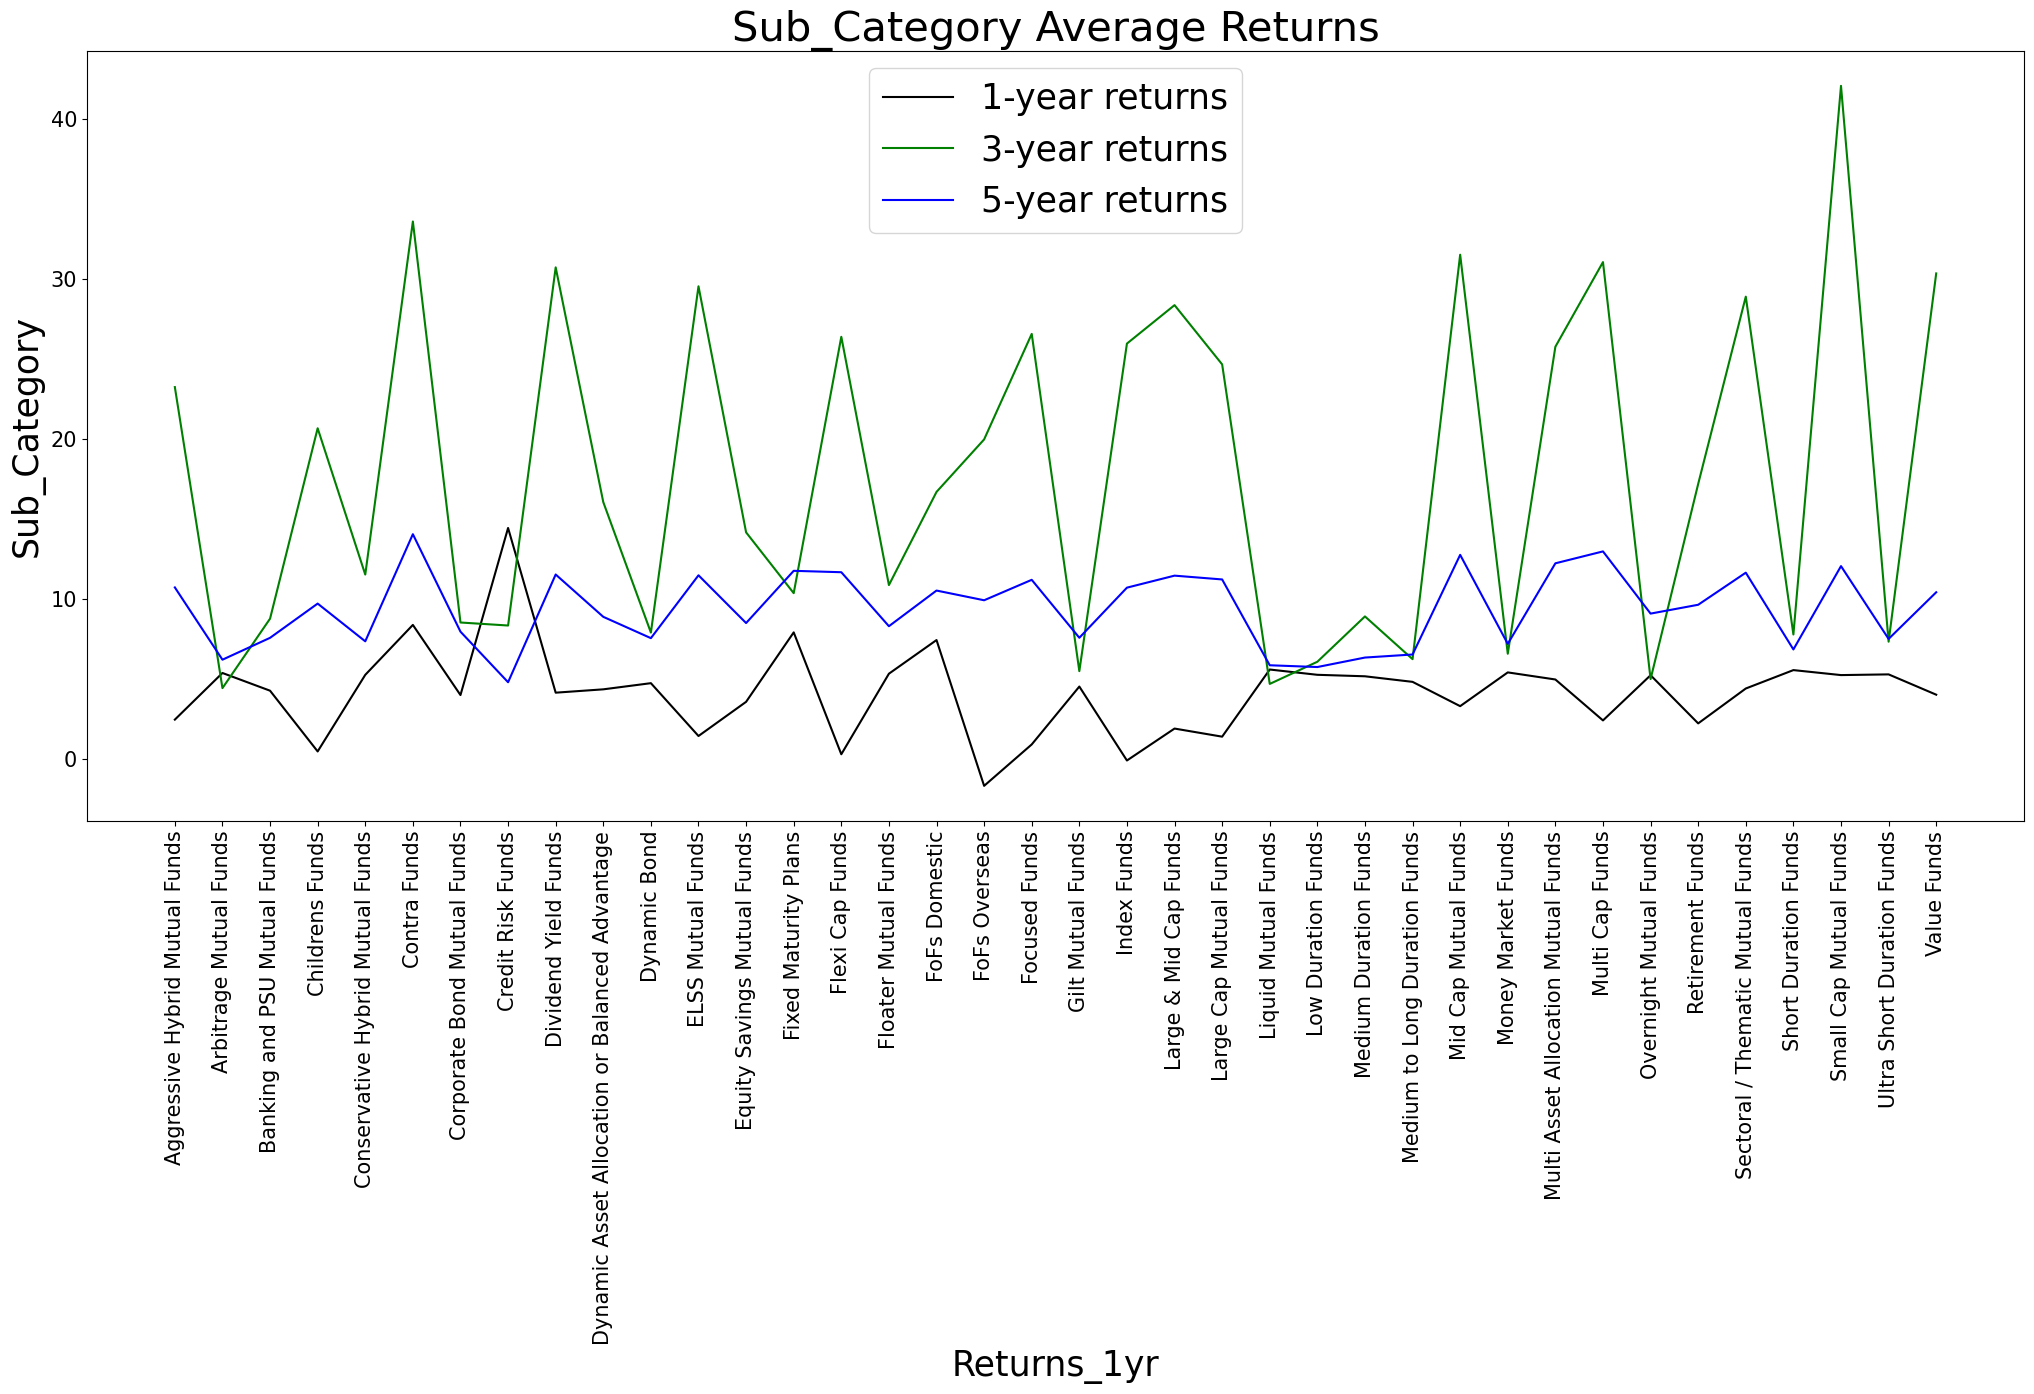

In [25]:
plt.figure(figsize=(25,10))
plt.title("Sub_Category Average Returns",fontsize=30)
plt.xlabel('Returns_1yr',fontsize=25)
plt.ylabel("Sub_Category", fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)


sns.lineplot(x=year_1df.index,y=year_1df.values,label='1-year returns',
            color='black')
sns.lineplot(x=year_3df.index,y=year_3df.values,label='3-year returns',
            color='g')
sns.lineplot(x=year_5df.index,y=year_5df.values,label='5-year returns',
            color='b')

plt.legend(fontsize=25)

# Worst Fund Return

In [26]:
min_year_1 = df.groupby('category')['returns_1yr'].min()
min_year_3 = df.groupby("category")['returns_3yr'].min()
min_year_5 = df.groupby('category')['returns_5yr'].min()

In [27]:
min_year_1

category
Debt                  1.6
Equity              -19.7
Hybrid               -5.7
Other               -12.1
Solution Oriented    -6.5
Name: returns_1yr, dtype: float64

In [28]:
min_year_3

category
Debt                  3.8
Equity               14.8
Hybrid                3.3
Other                 6.2
Solution Oriented     4.6
Name: returns_3yr, dtype: float64

In [29]:
min_year_5

category
Debt                -4.1
Equity               4.3
Hybrid               1.3
Other                5.3
Solution Oriented    6.7
Name: returns_5yr, dtype: float64

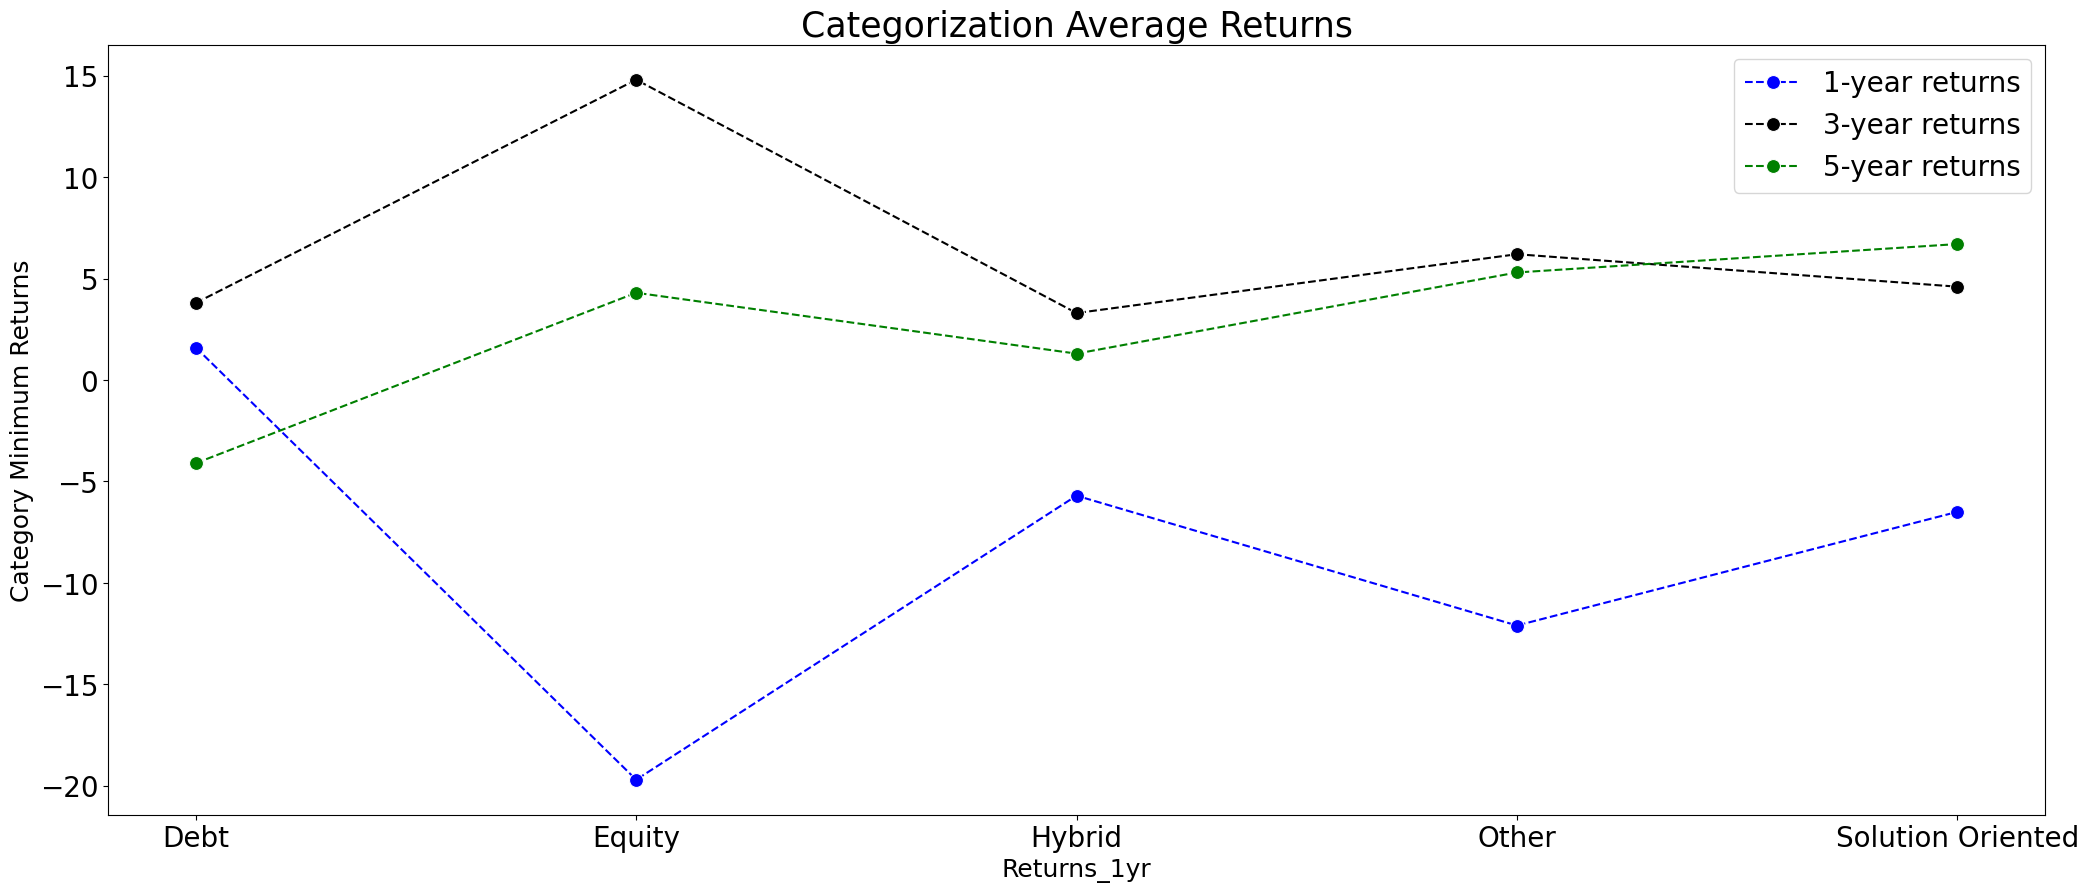

In [30]:
plt.figure(figsize=(25,10))
plt.title("Categorization Average Returns",fontsize=25)
plt.xlabel('Returns_1yr',fontsize=18)
plt.ylabel('Category Minimum Returns', fontsize=18)
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)


sns.lineplot(x=min_year_1.index,y=min_year_1.values,label='1-year returns',
            color='b',marker='o',markersize=10,linestyle='--')
sns.lineplot(x=min_year_3.index,y=min_year_3.values,label='3-year returns',
            color='black',marker='o',linestyle='--',markersize=10)
sns.lineplot(x=min_year_5.index,y=min_year_5.values,label='5-year returns',
            color='g',marker='o',linestyle='--',markersize=10)

plt.legend(fontsize=20)

In [31]:
min_year_1df = df.groupby('sub_category')['returns_1yr'].min()
min_year_3df = df.groupby('sub_category')['returns_3yr'].min()
min_year_5df = df.groupby('sub_category')['returns_5yr'].min()

In [32]:
min_year_1df

sub_category
Aggressive Hybrid Mutual Funds                    -5.7
Arbitrage Mutual Funds                             3.9
Banking and PSU Mutual Funds                       2.2
Childrens Funds                                   -6.5
Conservative Hybrid Mutual Funds                   1.8
Contra Funds                                       2.8
Corporate Bond Mutual Funds                        1.7
Credit Risk Funds                                  1.6
Dividend Yield Funds                              -1.5
Dynamic Asset Allocation or Balanced Advantage    -0.7
Dynamic Bond                                       1.7
ELSS Mutual Funds                                -11.1
Equity Savings Mutual Funds                        0.8
Fixed Maturity Plans                               4.4
Flexi Cap Funds                                   -9.0
Floater Mutual Funds                               4.4
FoFs Domestic                                     -5.8
FoFs Overseas                                    -12

In [33]:
min_year_3df

sub_category
Aggressive Hybrid Mutual Funds                    15.1
Arbitrage Mutual Funds                             3.3
Banking and PSU Mutual Funds                       5.0
Childrens Funds                                   15.2
Conservative Hybrid Mutual Funds                   8.1
Contra Funds                                      27.6
Corporate Bond Mutual Funds                        5.6
Credit Risk Funds                                  5.7
Dividend Yield Funds                              25.2
Dynamic Asset Allocation or Balanced Advantage     9.9
Dynamic Bond                                       4.4
ELSS Mutual Funds                                 15.7
Equity Savings Mutual Funds                        9.6
Fixed Maturity Plans                               6.2
Flexi Cap Funds                                   16.4
Floater Mutual Funds                               5.6
FoFs Domestic                                      6.2
FoFs Overseas                                      9

In [34]:
min_year_5df

sub_category
Aggressive Hybrid Mutual Funds                     5.900000
Arbitrage Mutual Funds                             2.800000
Banking and PSU Mutual Funds                       5.600000
Childrens Funds                                    7.600000
Conservative Hybrid Mutual Funds                   3.400000
Contra Funds                                      12.300000
Corporate Bond Mutual Funds                        4.400000
Credit Risk Funds                                 -4.100000
Dividend Yield Funds                               9.490726
Dynamic Asset Allocation or Balanced Advantage     5.100000
Dynamic Bond                                       6.000000
ELSS Mutual Funds                                  5.800000
Equity Savings Mutual Funds                        1.300000
Fixed Maturity Plans                               9.490726
Flexi Cap Funds                                    4.900000
Floater Mutual Funds                               6.200000
FoFs Domestic              

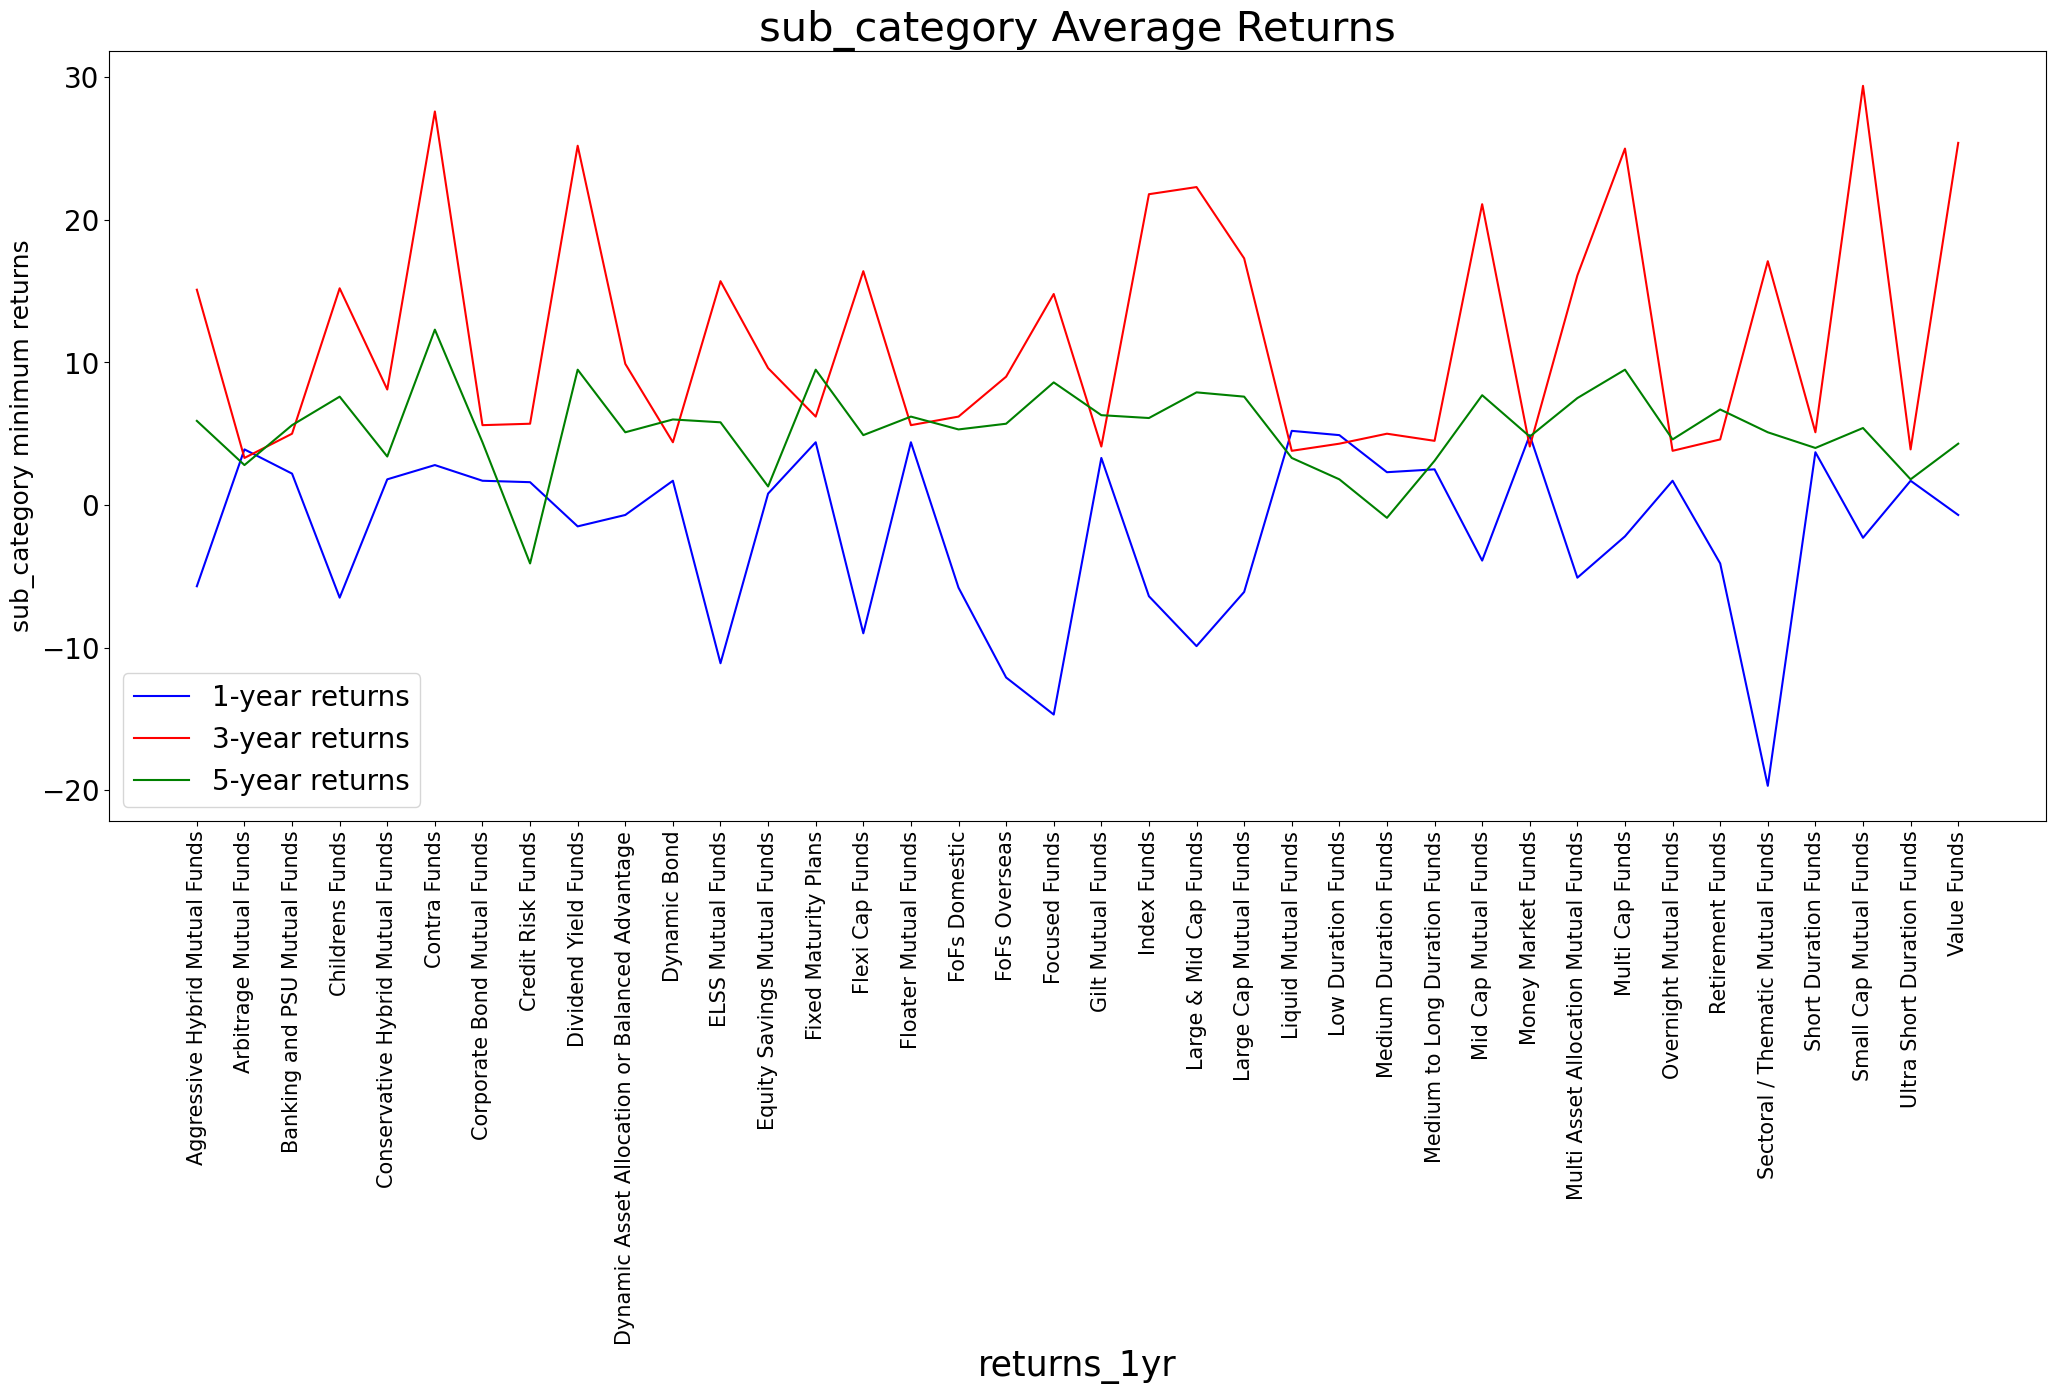

In [35]:
plt.figure(figsize=(25,10))
plt.title('sub_category Average Returns',fontsize=30)
plt.xlabel('returns_1yr',fontsize=25)
plt.ylabel('sub_category minimum returns',fontsize=18)
plt.xticks( rotation=90,fontsize=15)
plt.yticks( fontsize = 20)

sns.lineplot(x=min_year_1df.index,y=min_year_1df.values,label='1-year returns',
             color='b')
sns.lineplot(x=min_year_3df.index,y=min_year_3df.values,label='3-year returns',
            color='red')
sns.lineplot(x=min_year_5df.index,y=min_year_5df.values,label='5-year returns',
            color = 'g')

plt.legend(fontsize=20)

# Fund Performance Analysis

In [36]:
## Calculate the avarage returns for 1-year,3-year,and 5-year

df['Average_Returns_1yr'] = (df['returns_1yr']+1).pow(1/1)-1
df['Average_Returns_3yr'] = (df['returns_3yr']+1).pow(1/3)-1
df['Average_Returns_5yr'] = (df['returns_5yr']+1).pow(1/5)-1

In [37]:
df['Average_Returns_1yr']

0      4.0
1      5.6
2      2.0
3     -0.7
4      4.5
      ... 
809   -0.7
810    1.7
811    5.3
812    1.7
813    5.3
Name: Average_Returns_1yr, Length: 814, dtype: float64

In [38]:
df['Average_Returns_3yr']

0      0.957434
1      0.796702
2      1.709886
3      1.625586
4      1.696199
         ...   
809    1.415867
810    2.043802
811    0.686865
812    2.220442
813    0.765174
Name: Average_Returns_3yr, Length: 814, dtype: float64

In [39]:
df['Average_Returns_5yr']

0      0.511908
1      0.454061
2      0.606485
3      0.600152
4      0.606485
         ...   
809    0.484111
810    0.675386
811    0.600152
812    0.702422
813    0.600152
Name: Average_Returns_5yr, Length: 814, dtype: float64

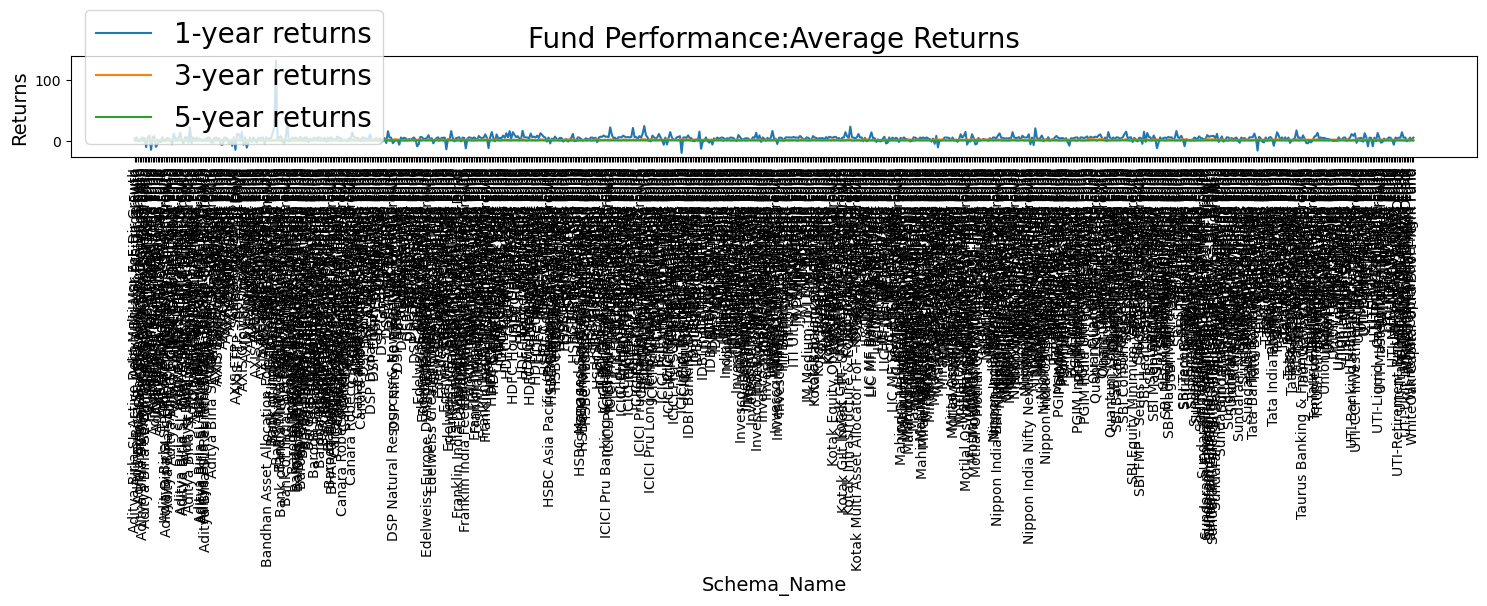

In [40]:
## Visualize the returns using line plots

plt.figure(figsize=(15,6))
plt.title('Fund Performance:Average Returns', fontsize=20)
plt.xlabel('Schema_Name',fontsize=14)
plt.ylabel('Returns',fontsize=14)

sns.lineplot(x=df['scheme_name'], y=df['Average_Returns_1yr'],
            label='1-year returns')

sns.lineplot(x=df['scheme_name'], y=df['Average_Returns_3yr'],
            label='3-year returns')
sns.lineplot(x=df['scheme_name'], y=df['Average_Returns_5yr'],
            label='5-year returns')

plt.xticks(rotation=90)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

# Identify the top performing funds in each category and sub-category

In [41]:
top_performing_funds = df.groupby(['category','sub_category']).apply(lambda x: x.nlargest(1, 'Average_Returns_5yr'))

top_performing_funds

scheme_name  \
category          sub_category                                                                                            
Debt              Banking and PSU Mutual Funds                   104         Baroda BNP Paribas Banking & PSU Bond Fund   
                  Corporate Bond Mutual Funds                    267                           HSBC Corporate Bond Fund   
                  Credit Risk Funds                              306                         ICICI Pru Credit Risk Fund   
                  Dynamic Bond                                   275                               HSBC Flexi Debt Fund   
                  Fixed Maturity Plans                           63                    AXIS FTP – Series 104 – 1112Days   
                  Floater Mutual Funds                           61                                   AXIS Floater Fund   
                  Gilt Mutual Funds                              157                                     DSP G-Sec Fund   
                  Liquid Mutual Funds                            413                                    ITI Liquid Fund   
                  Low Duration Funds                             32                   Aditya Birla SL Low Duration Fund   
                  Medium Duration Funds                          398                 Invesco India Medium Duration Fund   
                  Medium to Long Duration Funds                  555                           Nippon India Income Fund   
                  Money Market Funds                             71                              AXIS Money Market Fund   
                  Overnight Mutual Funds                         812                    WhiteOak Capital Overnight Fund   
                  Short Duration Funds                           480                        LIC MF Short Term Debt Fund   
                  Ultra Short Duration Funds                     538                         Navi Ultra Short Term Fund   
Equity            Contra Funds                                   623                                    SBI Contra Fund   
                  Dividend Yield Funds                           753                 Templeton India Equity Income Fund   
                  ELSS Mutual Funds                              609                      Quant Tax Plan- Direct Growth   
                  Flexi Cap Funds                                601                               Quant Flexi Cap Fund   
                  Focused Funds                                  371                           IIFL Focused Equity Fund   
                  Large & Mid Cap Funds                          501                 Mirae Asset Emerging Bluechip Fund   
                  Large Cap Mutual Funds                         126                 Canara Robeco Bluechip Equity Fund   
                  Mid Cap Mutual Funds                           606                                 Quant Mid Cap Fund   
                  Multi Cap Funds                                600                                  Quant Active Fund   
                  Sectoral / Thematic Mutual Funds               715                            Tata Digital India Fund   
                  Small Cap Mutual Funds                         608                               Quant Small Cap Fund   
                  Value Funds                                    351                     ICICI Pru Value Discovery Fund   
Hybrid            Aggressive Hybrid Mutual Funds                 599                                Quant Absolute Fund   
                  Arbitrage Mutual Funds                         86                        Bank of India Arbitrage Fund   
                  Conservative Hybrid Mutual Funds               436                             Kotak Debt Hybrid Fund   
                  Dynamic Asset Allocation or Balanced Advantage 223                       HDFC Balanced Advantage Fund   
                  Equity Savings Mutual Funds    

In [42]:
df['Average_Returns_5yr']

0      0.511908
1      0.454061
2      0.606485
3      0.600152
4      0.606485
         ...   
809    0.484111
810    0.675386
811    0.600152
812    0.702422
813    0.600152
Name: Average_Returns_5yr, Length: 814, dtype: float64

# Expense Ratio Impact

In [44]:
df.columns

Index(['scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio',
       'fund_size_cr', 'fund_age_yr', 'fund_manager', 'risk_level', 'amc_name',
       'rating', 'category', 'sub_category', 'returns_1yr', 'returns_3yr',
       'returns_5yr', 'Average_Returns_1yr', 'Average_Returns_3yr',
       'Average_Returns_5yr'],
      dtype='object')

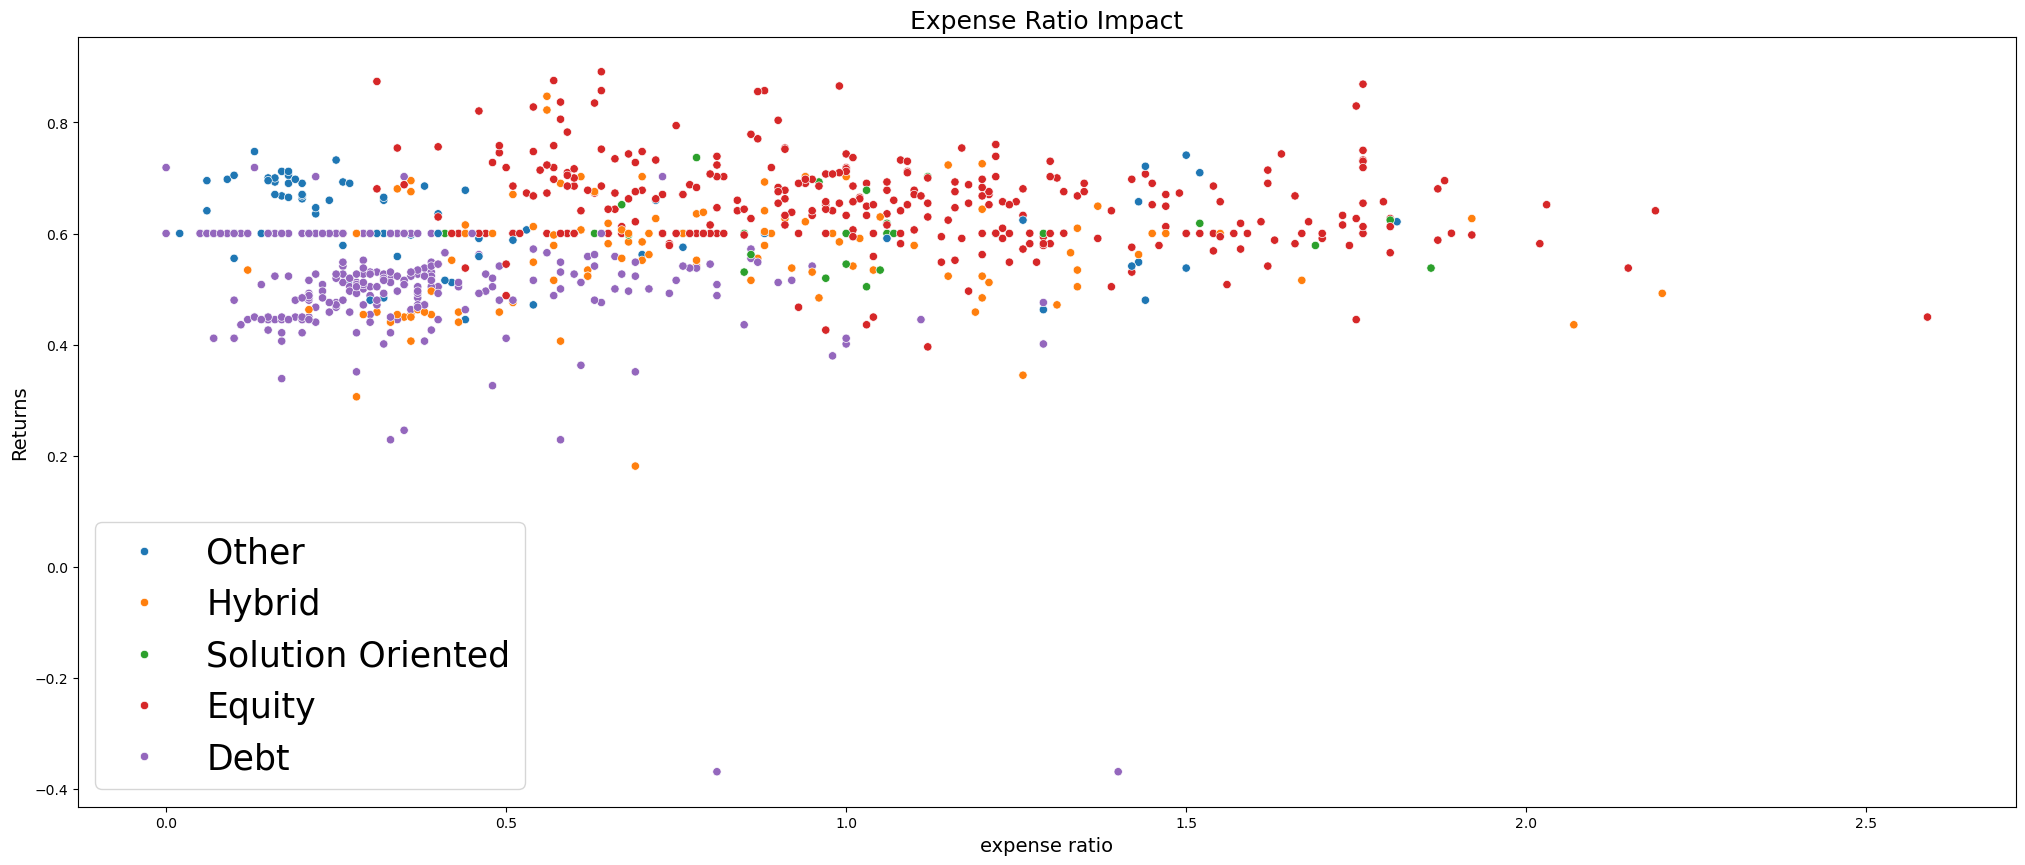

In [50]:
plt.figure(figsize=(25,10))
plt.title('Expense Ratio Impact',fontsize=18)
plt.xlabel('expense ratio', fontsize=14)
plt.ylabel('Returns',fontsize=14)

sns.scatterplot(x='expense_ratio', y='Average_Returns_5yr', hue='category', data=df)
plt.legend(fontsize=25)
plt.show()

# Fund Size and Age Analysis

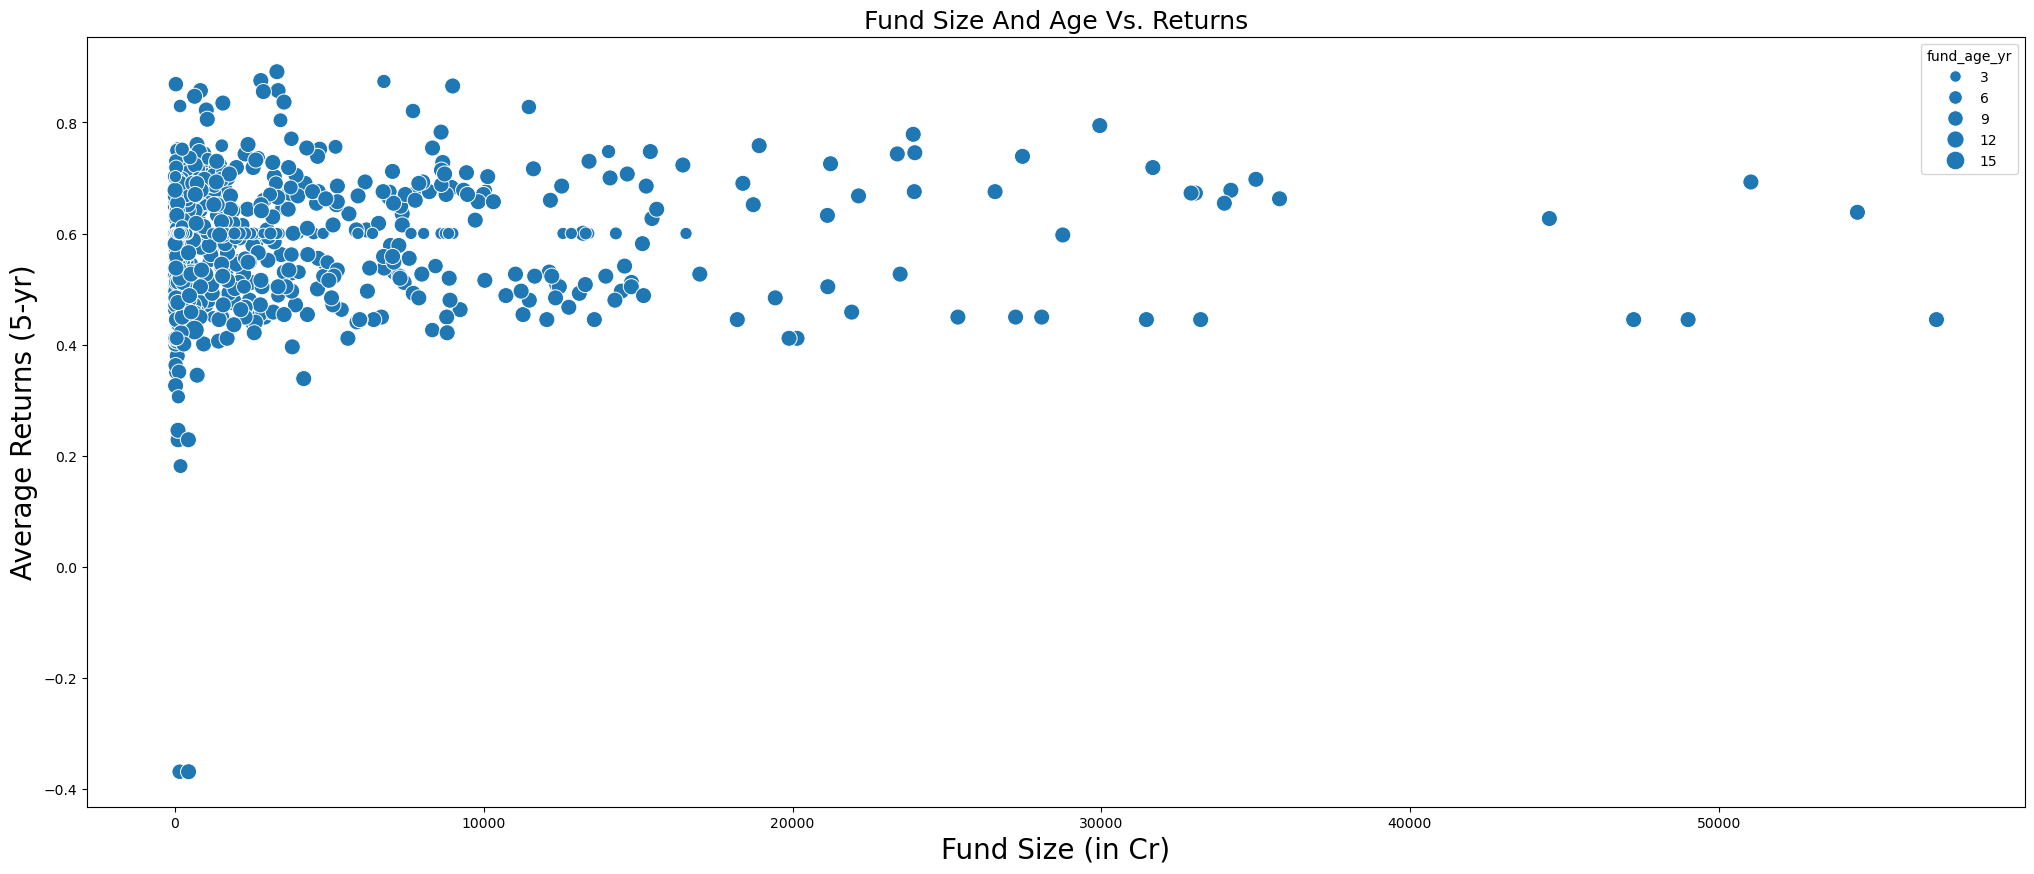

In [58]:
plt.figure(figsize=(25,10))
plt.title("Fund Size And Age Vs. Returns",fontsize=18)
plt.xlabel('Fund Size (in Cr)', fontsize=20)
plt.ylabel('Average Returns (5-yr)',fontsize=20)

sns.scatterplot(x='fund_size_cr', y='Average_Returns_5yr',size='fund_age_yr',
               data=df, sizes=(50,200))
plt.show()

# Fund Manger Impact

In [53]:
manager_returns = df.groupby('fund_manager')['Average_Returns_5yr'].mean()
manager_returns

fund_manager
Abhinav Khandelwal    0.644942
Abhinav Sharma        0.697633
Abhishek Bisen        0.596001
Abhishek Gupta        0.700034
Abhishek Iyer         0.522576
                        ...   
Vishal Thakker        0.600152
Vivek Ramakrishnan    0.513159
Vivek Sharma          0.530131
Vrijesh Kasera        0.600152
Yogesh Patil          0.643734
Name: Average_Returns_5yr, Length: 260, dtype: float64

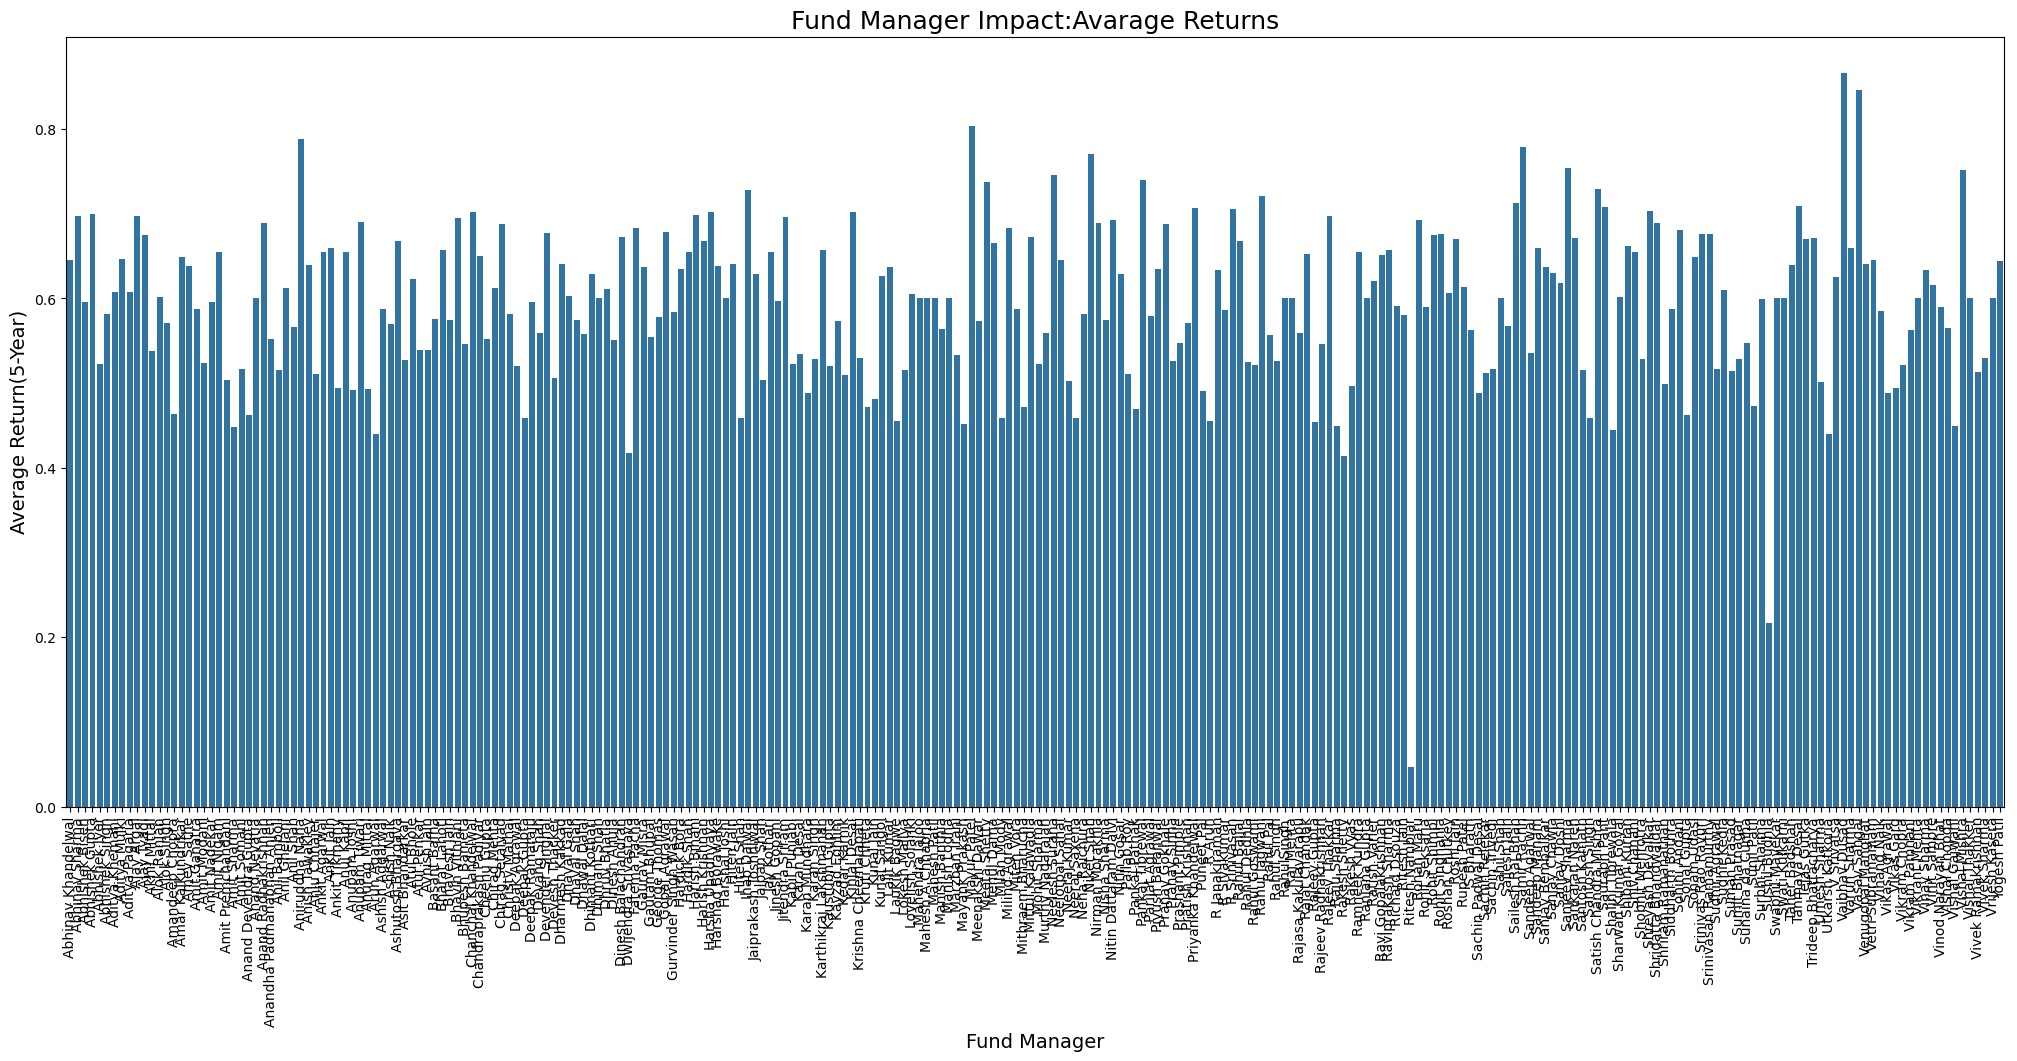

In [56]:
plt.figure(figsize=(25,10))
plt.title('Fund Manager Impact:Avarage Returns', fontsize=18)
plt.xlabel('Fund Manager',fontsize=14)
plt.ylabel('Average Return(5-Year)',fontsize=14)

sns.barplot(x=manager_returns.index, y=manager_returns.values)
plt.xticks(rotation=90)
plt.show()


# AMC Comparsion

In [59]:
amc_returns = df.groupby('amc_name')['Average_Returns_5yr'].mean()

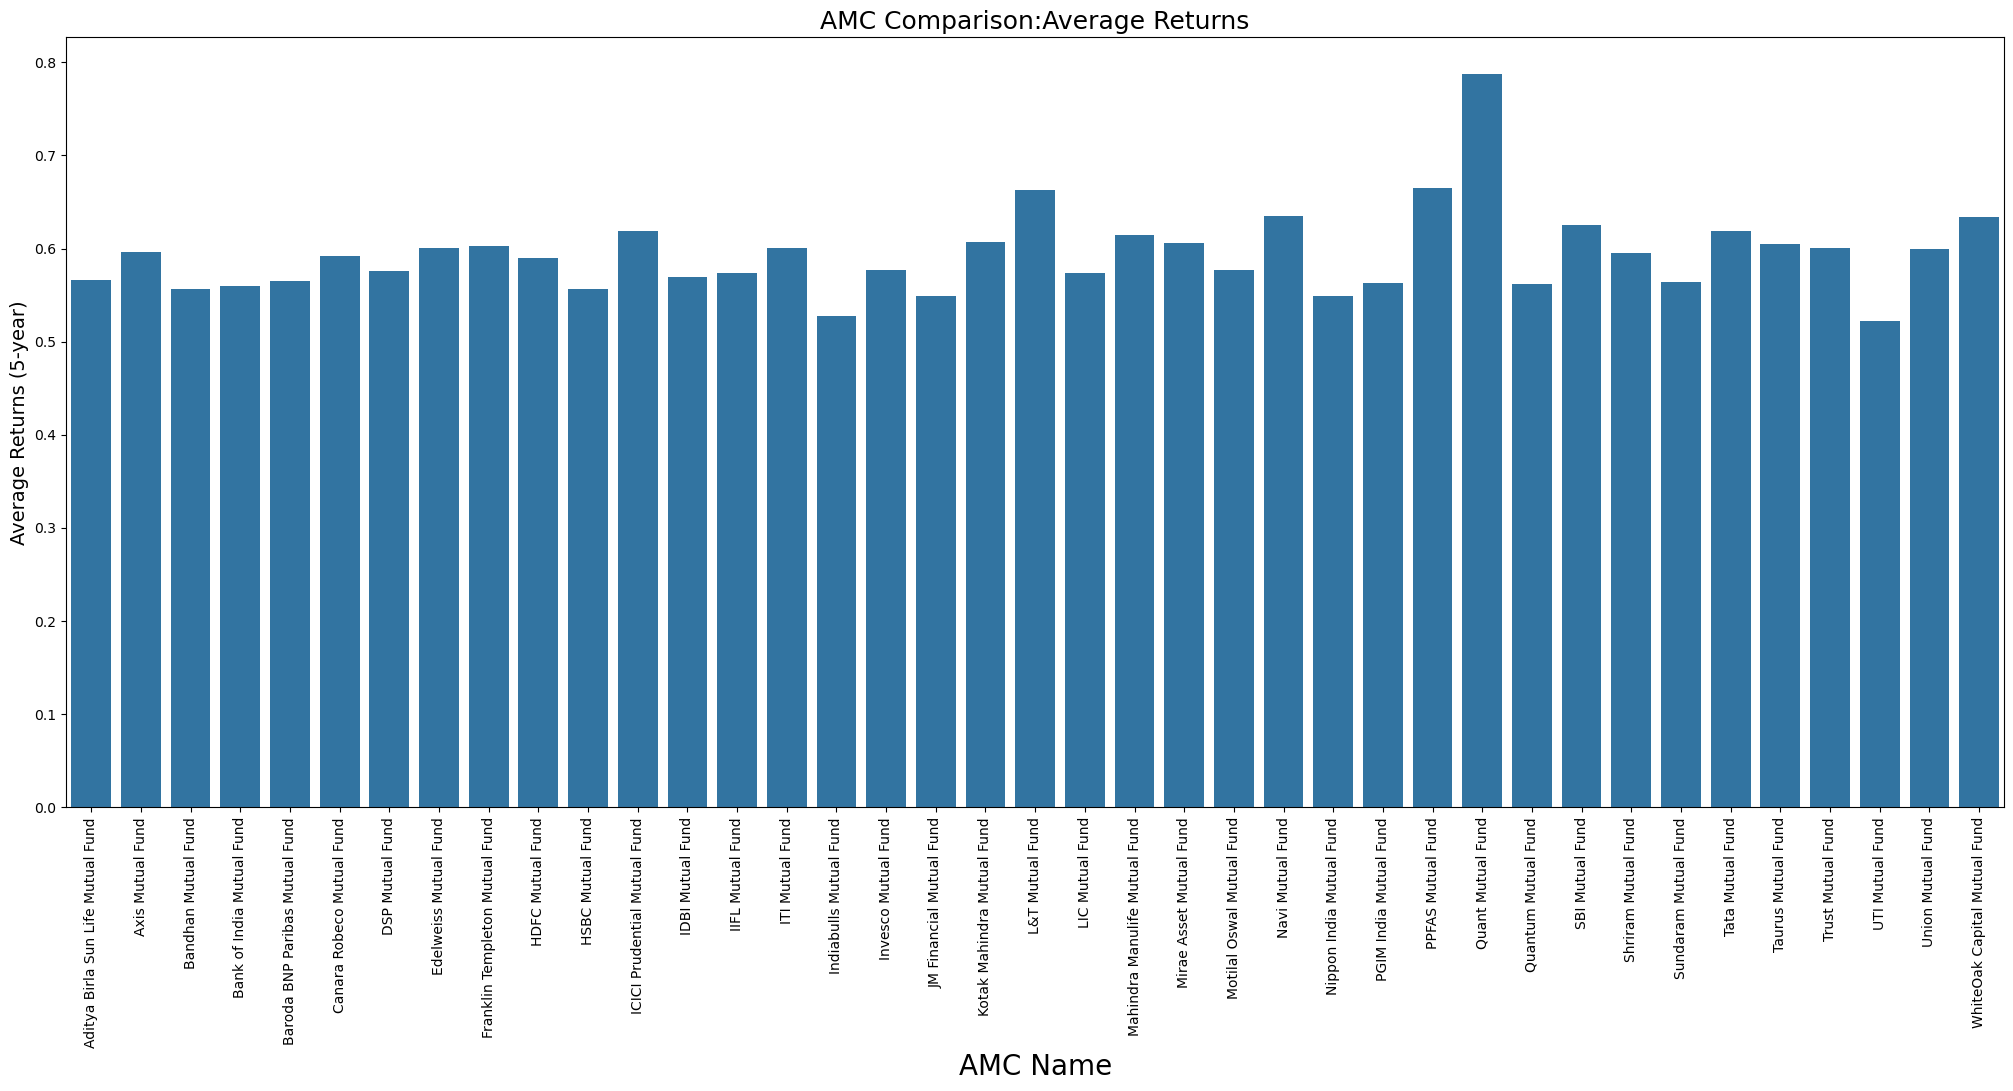

In [61]:
plt.figure(figsize=(25,10))
plt.title("AMC Comparison:Average Returns", fontsize=18)
plt.xlabel('AMC Name', fontsize=20)
plt.ylabel('Average Returns (5-year)',fontsize=14)

sns.barplot(x=amc_returns.index, y=amc_returns.values)
plt.xticks(rotation=90)
plt.show()

# SIP Vs Lumpsum Analysis

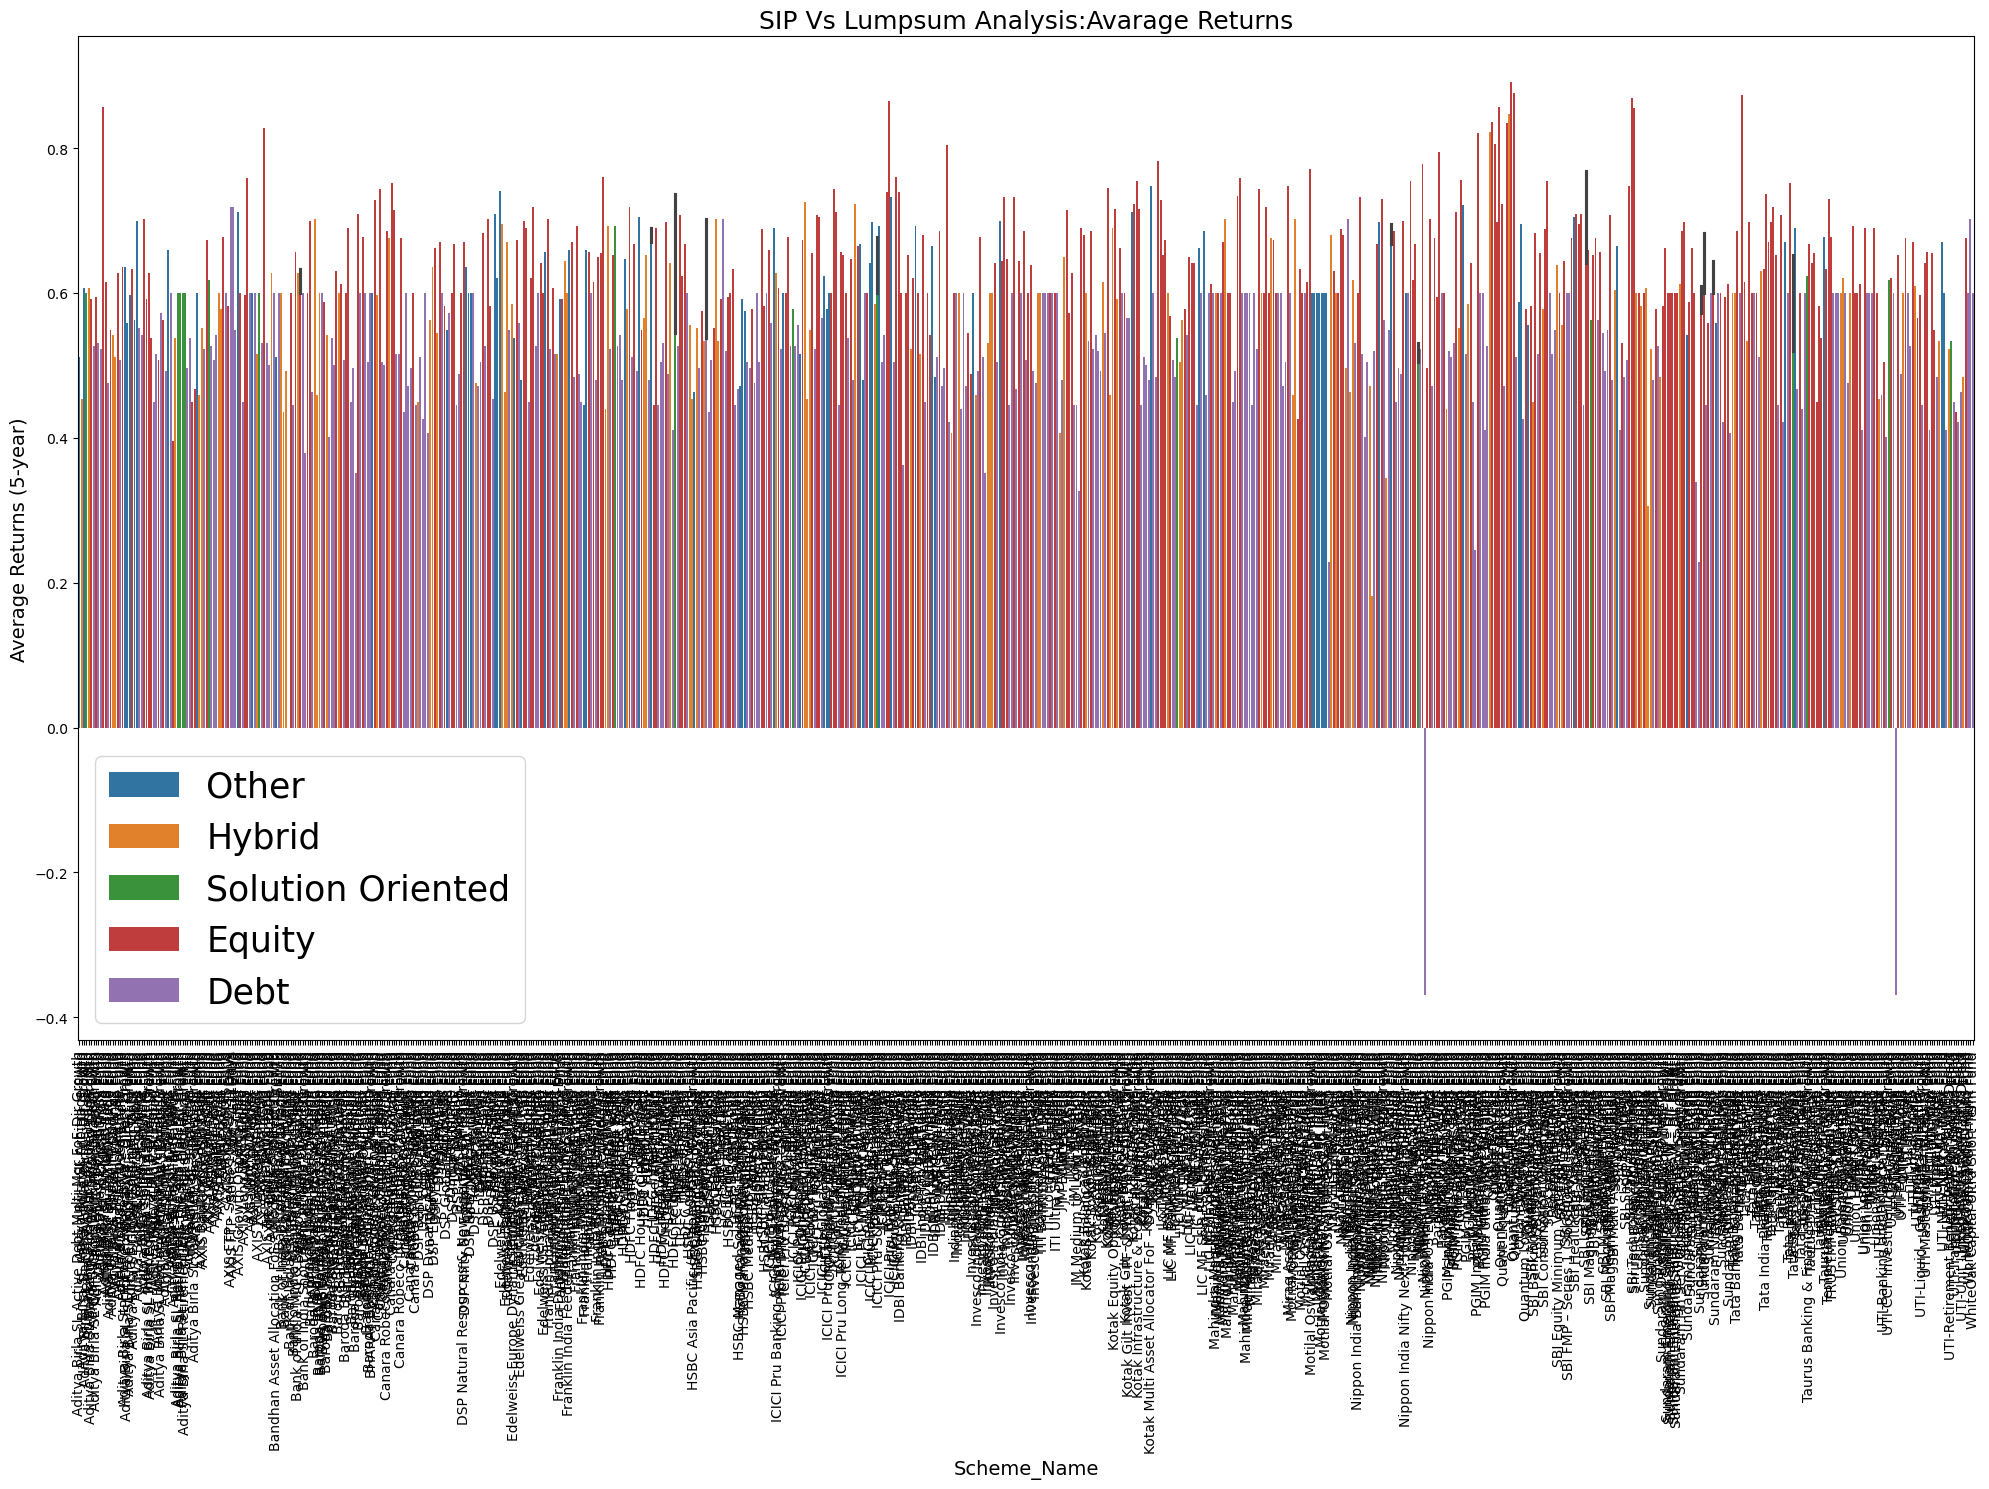

In [64]:
plt.figure(figsize=(20,15))
plt.title("SIP Vs Lumpsum Analysis:Avarage Returns",fontsize=18)
plt.xlabel('Scheme_Name',fontsize=14)
plt.ylabel('Average Returns (5-year)',fontsize=14)

sns.barplot(x=df['scheme_name'],y=df['Average_Returns_5yr'],
           hue=df['category'])
plt.xticks(rotation=90)
plt.legend(fontsize=25)
plt.tight_layout()
plt.show()
           

In [65]:
df

scheme_name  min_sip  min_lumpsum  \
0    Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...      100          100   
1                       Aditya Birla SL Arbitrage Fund     1000         1000   
2       Aditya Birla SL Asset Allocator FoF-Dir Growth     1000         1000   
3     Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
4              Aditya Birla SL Balanced Advantage Fund      100          100   
..                                                 ...      ...          ...   
809            UTI-Unit Linked Insurance Plan – Direct      500        15000   
810                       UTI-Value Opportunities Fund      500         5000   
811                       WhiteOak Capital Liquid Fund      500          500   
812                    WhiteOak Capital Overnight Fund      500          500   
813             WhiteOak Capital Ultra Short Term Fund      500          500   

     expense_ratio  fund_size_cr  fund_age_yr        fund_manager  risk_level  \
0             0.27          10.0           10      Kaustubh Gupta           3   
1             0.36        4288.0           10    Lovelish Solanki           1   
2             0.53         157.0           10  Vinod Narayan Bhat           5   
3             0.76         637.0            4         Atul Penkar           6   
4             0.61        6386.0           10        Mohit Sharma           6   
..             ...           ...          ...                 ...         ...   
809           0.96        5068.0           10     Amandeep Chopra           4   
810           1.16        6740.0           10   Vetri Subramaniam           6   
811           0.26         197.0            4     Piyush Baranwal           1   
812           0.22          14.0            4     Piyush Baranwal           1   
813           0.33         141.0            4     Piyush Baranwal           1   

                              amc_name  rating           category  \
0    Aditya Birla Sun Life Mutual Fund       3              Other   
1    Aditya Birla Sun Life Mutual Fund       3             Hybrid   
2    Aditya Birla Sun Life Mutual Fund       3              Other   
3    Aditya Birla Sun Life Mutual Fund       2  Solution Oriented   
4    Aditya Birla Sun Life Mutual Fund       4             Hybrid   
..                                 ...     ...                ...   
809                    UTI Mutual Fund       0             Hybrid   
810                    UTI Mutual Fund       4             Equity   
811       WhiteOak Capital Mutual Fund       1               Debt   
812       WhiteOak Capital Mutual Fund       1               Debt   
813       WhiteOak Capital Mutual Fund       2               Debt   

                                       sub_category  returns_1yr  returns_3yr  \
0                                     FoFs Domestic          4.0          6.5   
1                            Arbitrage Mutual Funds          5.6          4.8   
2                                     FoFs Domestic          2.0         18.9   
3                                   Childrens Funds         -0.7         17.1   
4    Dynamic Asset Allocation or Balanced Advantage          4.5         18.6   
..                                              ...          ...          ...   
809  Dynamic Asset Allocation or Balanced Advantage         -0.7         13.1   
810                                     Value Funds          1.7         27.2   
811                             Liquid Mutual Funds          5.3          3.8   
812                          Overnight Mutual Funds          1.7         32.4   
813                      Ultra Short Duration Funds          5.3          4.5   

     returns_5yr  Average_Returns_1yr  Average_Returns_3yr  \
0       6.900000                  4.0             0.957434   
1       5.500000                  5.6             0.796702   
2       9.700000                  2.0             1.709886   
3       9.490726                 -0.7             1.625586 

In [3]:
## Fund Size and Age Analysis

#1.There is no obvious correlation between fund size(in crores) or fund age
#  (in years) and the returns.
#2.Funds of different sizes and ages exhibit a wide ranfe of returns

In [4]:
## Categorization Analysis

#1.Equity funds generally show higher returns compared to Dept and Hybrid
#  funds.
#2.Among sub-categories,small cap mutual funds and medium duration
#  Funds have shown some of the best returns.

In [5]:
## Fund manager impact

#1.Different fund mangers have varying impacts on fund performance.
#2.Some fund managers cosistently mamage funds with hidh returns,while
#  others have more modest performance

In [6]:
## AMC Comparison

#Different AMCs have different average returns across their funds, indicating varying levels of expertise and performance among AMC houses.
#Some AMCs have more top-performing funds across categories, potentially suggesting better overall fund management

In [ ]:
## SIP Vs Lumpsum Analysis
#  There is no significant difference between the average returns of funds invested via SIP or Lumpsum, suggesting that both investment methods 
#have similar outcomes in the given dataset.